## Data Analysis

In [116]:
import pandas as pd

# Combine datasets
ravdess_path = "Dataset/RAVDESS_features_dataset.csv"
tess_path = "Dataset/TESS_features_dataset.csv"
crema_d_path = "Dataset/CREMA-D_features_dataset.csv"
savee_path = "Dataset/SAVEE_features_dataset.csv"

# Load datasets
ravdess_dataset = pd.read_csv(ravdess_path)
tess_dataset = pd.read_csv(tess_path)
crema_d_dataset = pd.read_csv(crema_d_path)
savee_dataset = pd.read_csv(savee_path)

# Combine into one dataset
dataset = pd.concat([ravdess_dataset, tess_dataset, crema_d_dataset, savee_dataset], ignore_index=True)

# Save combined dataset to a CSV file
dataset.to_csv("Dataset/combined_features_dataset.csv", index=False)

print("All datasets combined and saved to 'Dataset/combined_features_dataset.csv'.")


# Display the first few rows of the dataset
print(dataset.head())

# Check the dataset's structure
print(dataset.info())

All datasets combined and saved to 'Dataset/combined_features_dataset.csv'.
       RMSE  Zero_Crossing_Rate  Mel_Spectrogram_Mean     MFCC_1     MFCC_2  \
0  0.014747            0.181806            -49.928920 -565.68760  43.782420   
1  0.010142            0.164250            -53.197456 -605.44180  45.174736   
2  0.047152            0.237027            -38.741500 -443.21610  24.900938   
3  0.030824            0.148445            -41.572445 -473.73538  44.729717   
4  0.005151            0.137492            -58.592377 -663.29486  60.307990   

      MFCC_3    MFCC_4     MFCC_5     MFCC_6     MFCC_7  ...  Chroma_11  \
0  -3.419823  4.879561 -11.828972  -7.854157 -10.851251  ...   0.356888   
1  -5.537606  6.142505  -2.014863 -10.605732 -15.667695  ...   0.345317   
2 -30.117960  0.428244 -11.970781 -20.010164 -16.112022  ...   0.492545   
3 -10.718471  6.005490 -12.931274 -14.678432  -5.036605  ...   0.286623   
4   1.032603  9.540112  -6.581423  -2.948161 -10.793342  ...   0.264617   

In [98]:
# Dropping rows with unknown emotion:
# Drop rows with 'Emotion' as 'unknown'
dataset = dataset[dataset['Emotion'] != 'unknown']

# Verify if the rows are dropped
print(dataset['Emotion'].value_counts())

print("Filtered dataset")


Emotion
neutral      2463
angry        2455
disgust      2455
sad          2455
happy        2455
fearful      1655
surprised     384
Name: count, dtype: int64
Filtered dataset


## Summary Statistics

In [99]:

# Summary statistics for numerical features
summary_stats = dataset.describe()

# Display class distribution
emotion_counts = dataset['Emotion'].value_counts()

print("Summary Statistics:\n", summary_stats)
print("\nClass Distribution:\n", emotion_counts)


Summary Statistics:
                RMSE  Zero_Crossing_Rate  Mel_Spectrogram_Mean        MFCC_1  \
count  14322.000000        14322.000000          14322.000000  14322.000000   
mean       0.019352            0.099987            -48.825312   -554.165028   
std        0.019148            0.074164              7.951172     89.592998   
min        0.000000            0.000000           -100.000000  -1131.371000   
25%        0.008216            0.045654            -53.673035   -608.562700   
50%        0.012979            0.069494            -48.254932   -547.983100   
75%        0.023310            0.134567            -43.621268   -496.190980   
max        0.218972            0.439979            -21.130413   -243.252990   

             MFCC_2        MFCC_3        MFCC_4        MFCC_5        MFCC_6  \
count  14322.000000  14322.000000  14322.000000  14322.000000  14322.000000   
mean      80.531130      6.667153     26.712180     -4.203577      8.031460   
std       34.326400     12.813

In [100]:
# Check for missing values
print(dataset.isnull().sum())

RMSE                    0
Zero_Crossing_Rate      0
Mel_Spectrogram_Mean    0
MFCC_1                  0
MFCC_2                  0
                       ..
Spectral_Flatness       0
Spectral_Rolloff        0
Duration                0
Silence                 0
Emotion                 0
Length: 67, dtype: int64


## Correlation Matrix Visualization

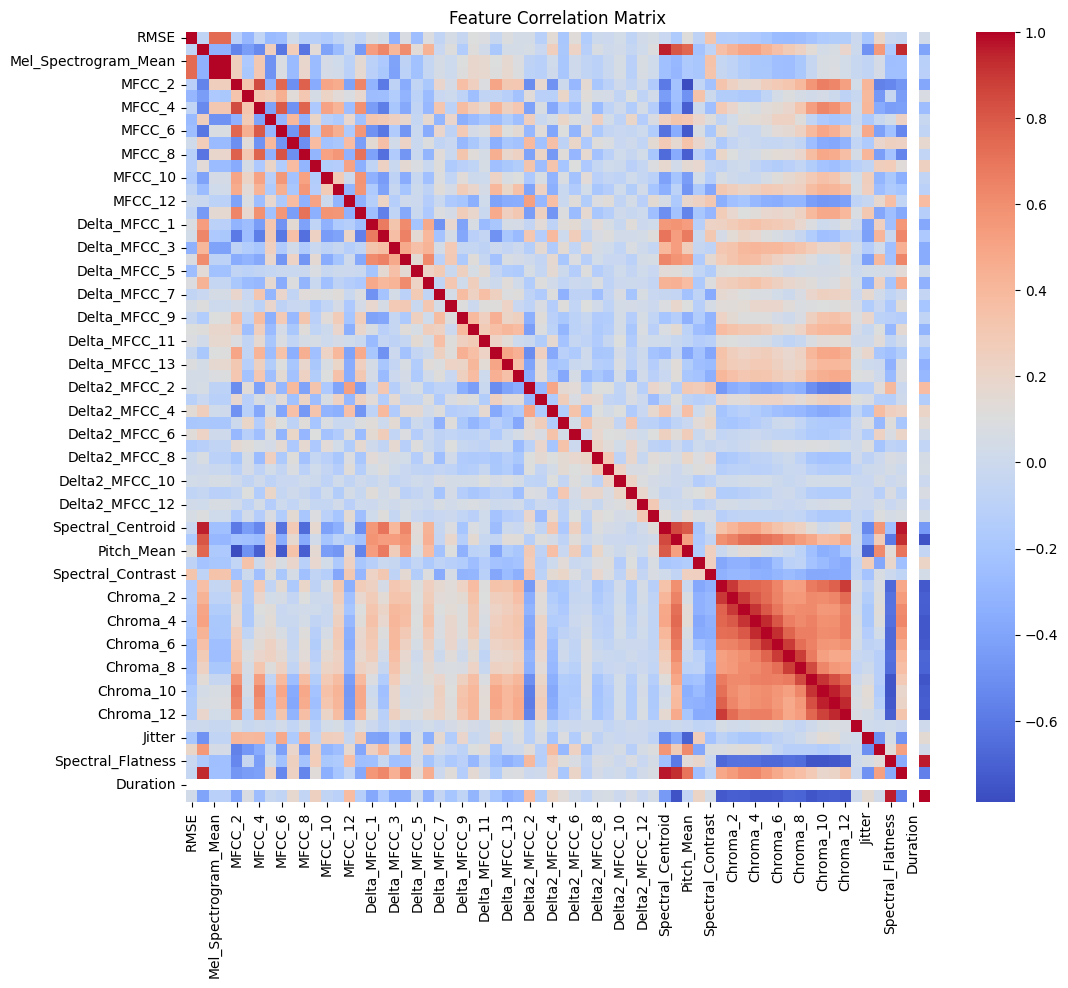

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = dataset.drop(columns=['Emotion']).corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()


Correlation Matrix:
1. High Correlation Among MFCCs:
- Many of the MFCC features (e.g., MFCC_2, MFCC_4, MFCC_6, etc.) are highly correlated.
- Similarly, their derivatives (Delta_MFCC, Delta2_MFCC) show strong inter-correlations.
- This could indicate redundancy among MFCC-related features. Dimensionality reduction techniques like PCA (Principal Component Analysis) may help to reduce feature redundancy while retaining important information.

2. Spectral Features:
- Features like Spectral_Flatness and Spectral_Contrast show low to moderate correlations with MFCCs and chroma features.
- These features may bring unique information compared to the MFCC-heavy correlation.

3. Distinct Groups:
- Chroma features form their own moderately correlated cluster, which seems distinct from MFCCs.
- This indicates they contribute complementary information and should likely be retained.

4. Low Correlation with Duration:
- The Duration feature has low correlation with most other features. This could make it useful as an independent predictor.

5. Jitter and Shimmer:
- Jitter and Shimmer do not show strong correlations with MFCCs or chroma features. They likely capture unique aspects of the audio signal, particularly related to voice quality.


## Feature Distributions

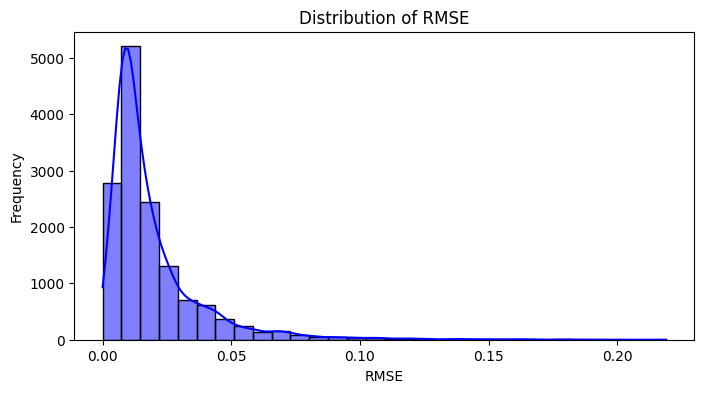

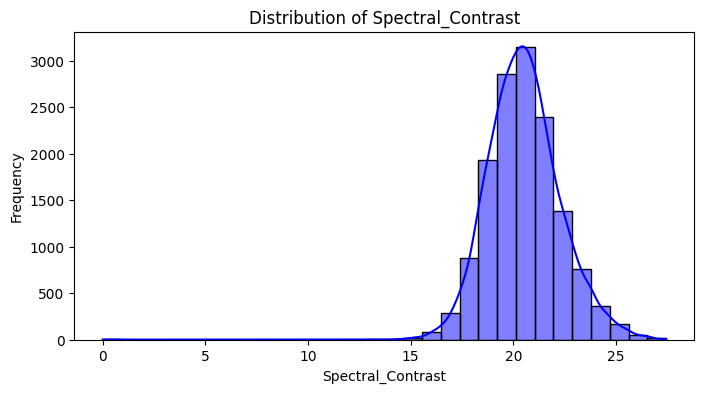

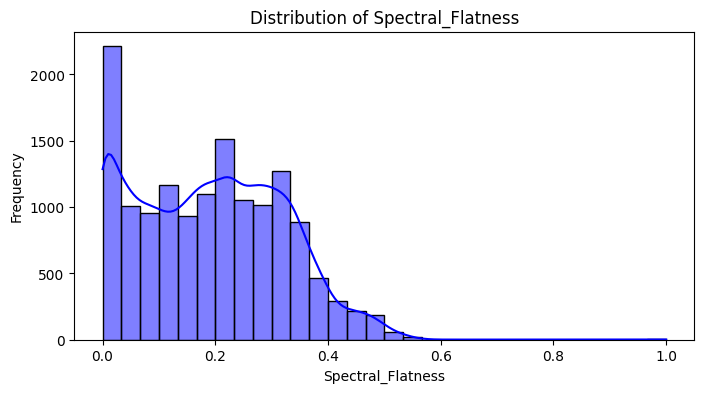

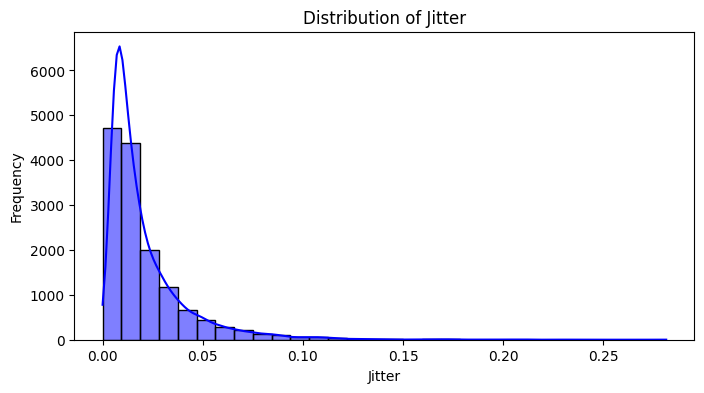

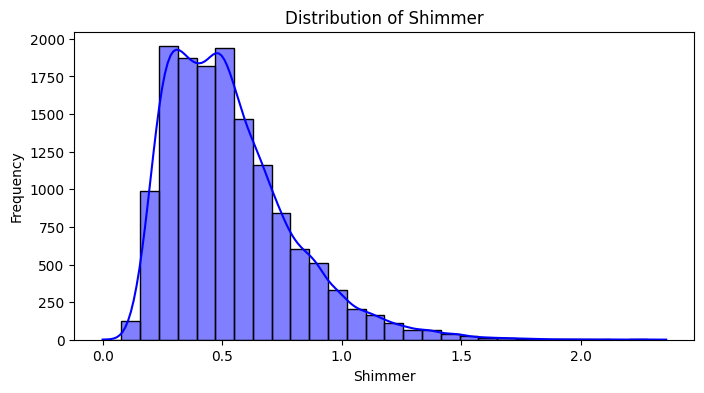

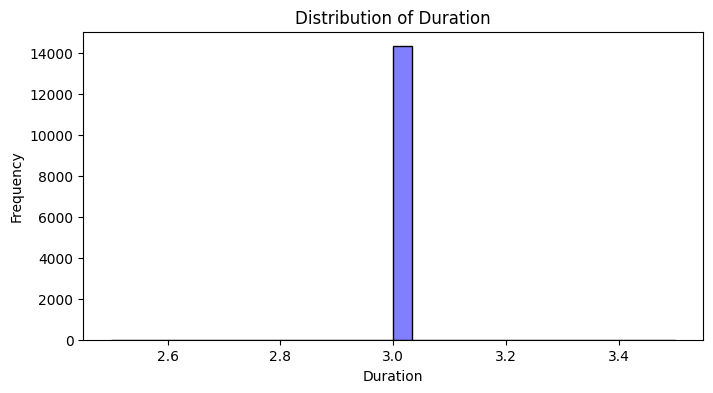

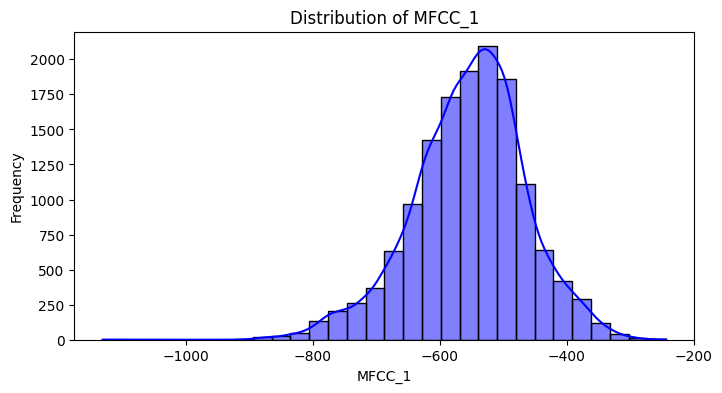

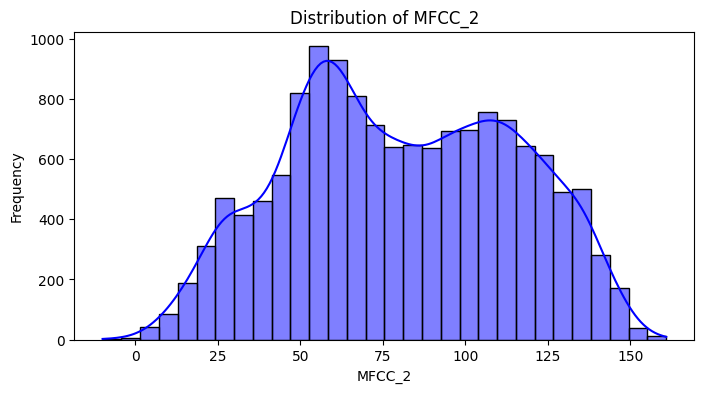

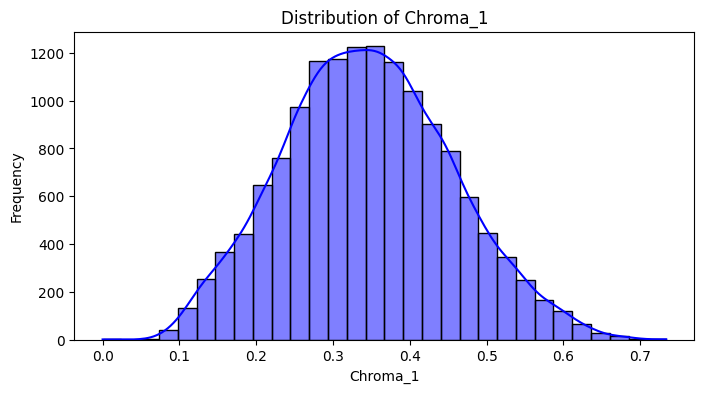

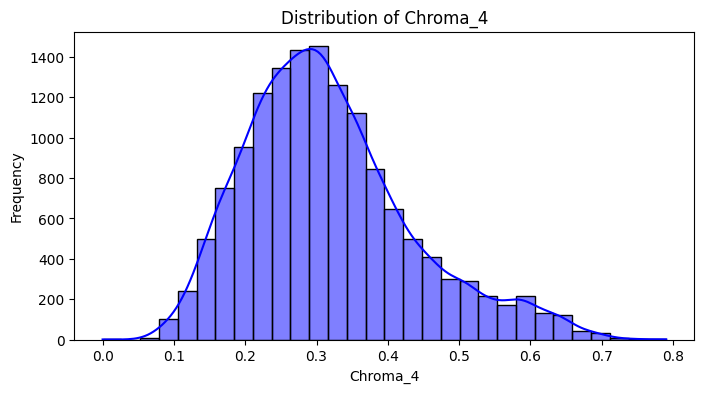

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to analyze
features_to_plot = ['RMSE', 'Spectral_Contrast', 'Spectral_Flatness', 
                    'Jitter', 'Shimmer', 'Duration', 'MFCC_1', 'MFCC_2', 
                    'Chroma_1', 'Chroma_4']

# Plot histograms for selected features
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


### Insights from Feature Distribution Visualizations:

#### 1. **RMSE (Root Mean Square Energy)**:
   - **Observation**: Highly right-skewed, with most values concentrated around a low range.
   - **Insight**: This indicates that most audio signals are of low energy, which could correspond to softer or less intense emotions (e.g., neutral, calm).

#### 2. **Spectral Contrast**:
   - **Observation**: The distribution appears roughly normal with a peak around 20.
   - **Insight**: Spectral contrast is relatively uniform across samples. However, its variation might be useful in distinguishing high-energy emotions (e.g., angry) from low-energy ones (e.g., neutral).

#### 3. **Spectral Flatness**:
   - **Observation**: Right-skewed, with most values concentrated near 0 and a long tail.
   - **Insight**: The skew suggests that most samples are tone-like (not noise-like). This feature may help differentiate emotions with tonal consistency (e.g., happiness) from noisy ones (e.g., anger).

#### 4. **Jitter and Shimmer**:
   - **Jitter**: Highly skewed, with most values near zero.
   - **Shimmer**: A broader distribution, peaking around 0.5.
   - **Insight**: Jitter and shimmer capture voice quality, and their variation could help distinguish emotional intensity (e.g., sadness may have lower jitter, while anger may have higher).

#### 5. **Duration**:
   - **Observation**: A single spike at 3 seconds, which is expected since the dataset was normalized for consistent duration.
   - **Insight**: This confirms preprocessing was applied correctly. Duration won't contribute to distinguishing emotions here.

#### 6. **MFCC_1 and MFCC_2**:
   - **MFCC_1**: Symmetrical, centered distribution.
   - **MFCC_2**: Multi-modal, indicating multiple clusters of data.
   - **Insight**: MFCC_2's multi-modal behavior might indicate underlying clusters corresponding to different emotions.

#### 7. **Chroma_1 and Chroma_4**:
   - **Observation**: Both features are nearly normal, with slight variation.
   - **Insight**: Chroma features are useful for capturing pitch, which might relate to pitch-heavy emotions like happiness or fear.

---

### Suggested Next Steps:
1. **Compare Distributions Across Emotions**:
   - Create emotion-specific distributions for features like `RMSE`, `Spectral_Contrast`, and `Jitter` to see how they vary by emotion.

2. **Outlier Detection**:
   - Identify outliers in features like `RMSE` and `Spectral_Flatness` that could skew training.

3. **Feature-Emotion Relationships**:
   - Use boxplots or violin plots to visualize relationships between these features and the `Emotion` labels.




## Class-wise Feature Analysis

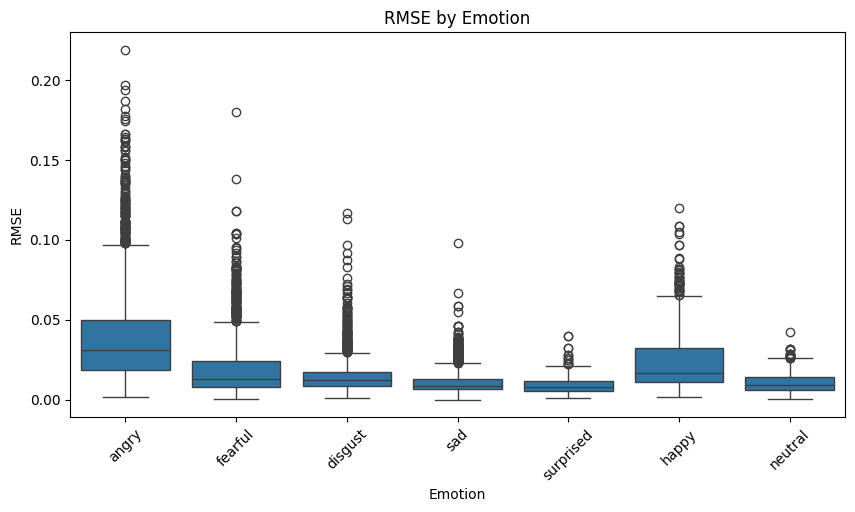

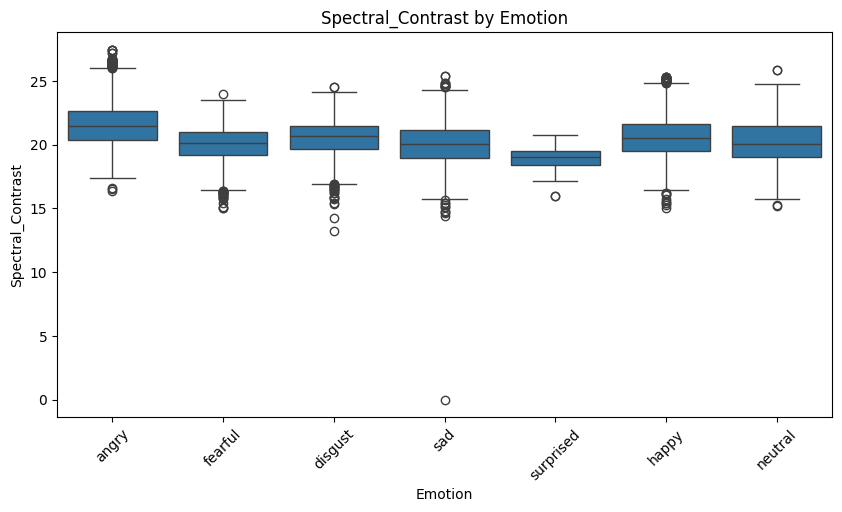

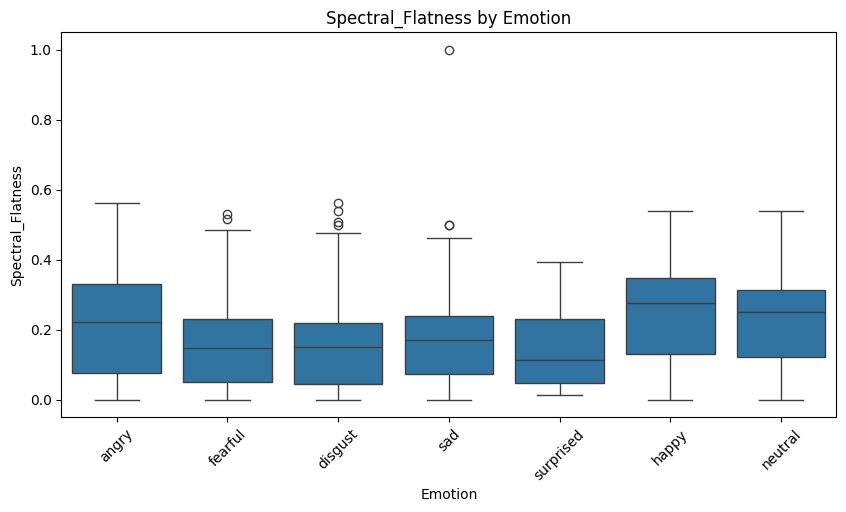

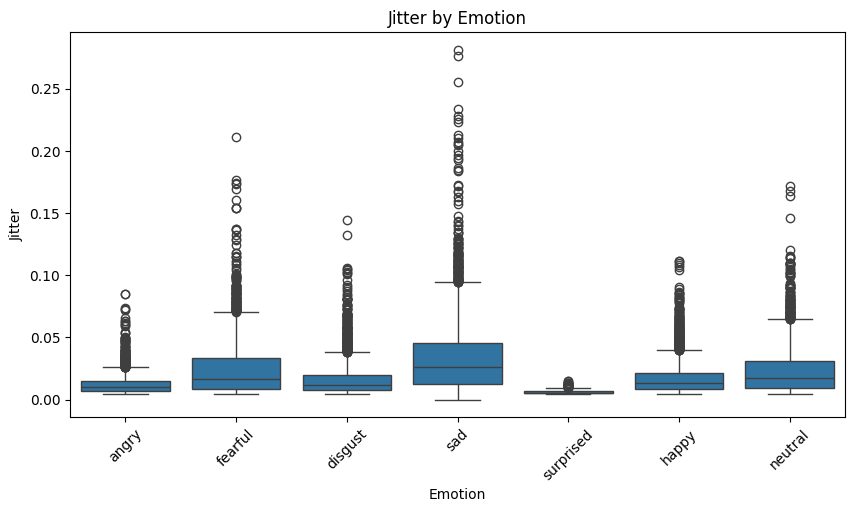

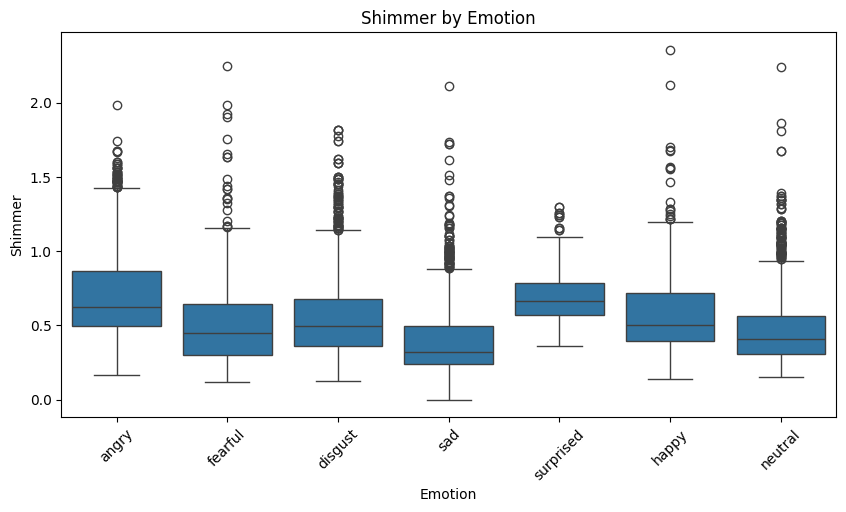

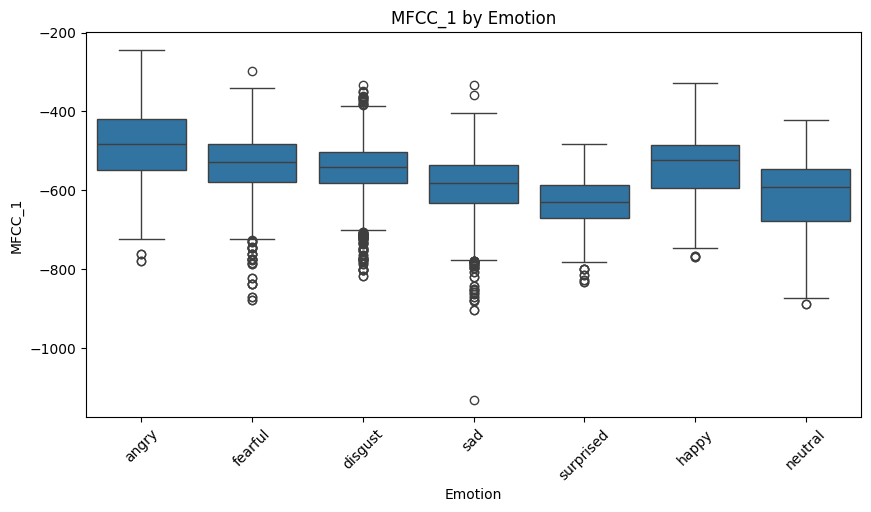

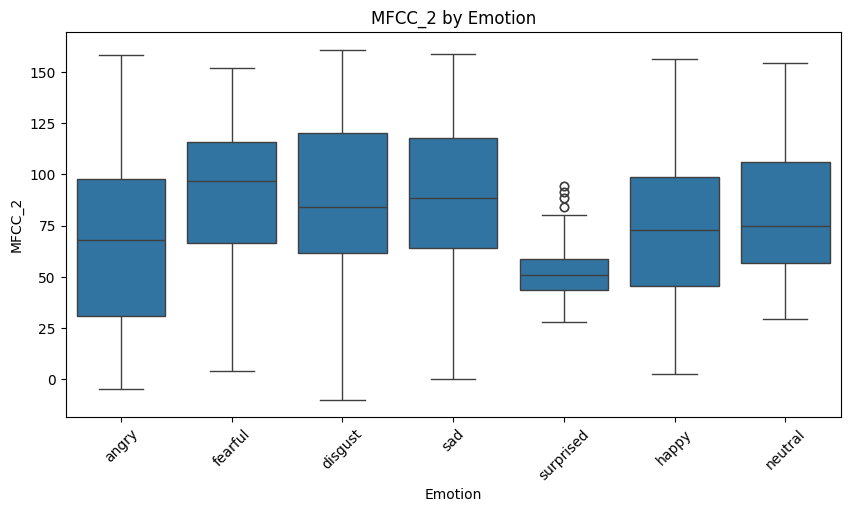

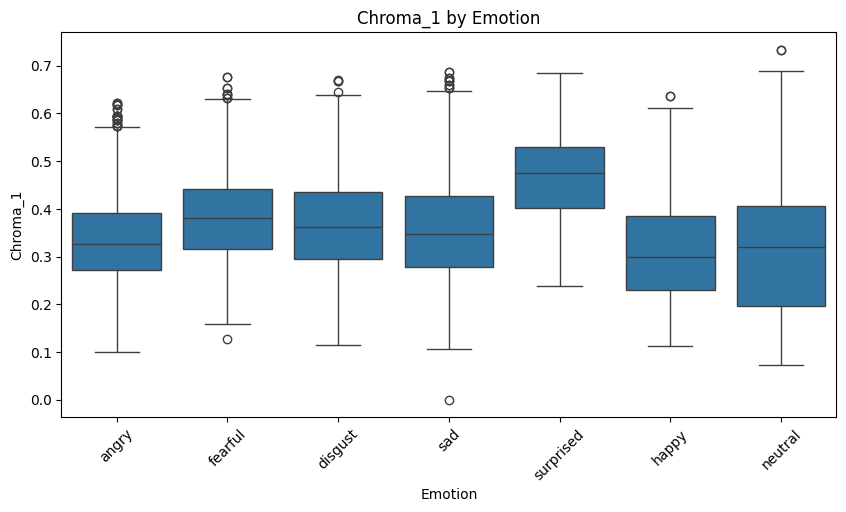

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to analyze
features_to_plot = ['RMSE', 'Spectral_Contrast', 'Spectral_Flatness', 
                    'Jitter', 'Shimmer', 'MFCC_1', 'MFCC_2', 'Chroma_1']

# Boxplots for selected features by Emotion
for feature in features_to_plot:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Emotion', y=feature, data=dataset)
    plt.title(f"{feature} by Emotion")
    plt.xlabel("Emotion")
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.show()



### Observations from Class-Wise Feature Analysis

#### 1. **RMSE by Emotion**:
   - **Observation**: Higher median values for `angry` and `happy`, while `sad`, `neutral`, and `fearful` have lower energy.
   - **Insight**: RMSE captures the intensity of emotions well, differentiating high-energy emotions (e.g., `angry`) from low-energy ones (e.g., `sad`).

#### 2. **Spectral Contrast by Emotion**:
   - **Observation**: `angry` and `happy` have slightly higher median spectral contrast compared to `sad` and `neutral`.
   - **Insight**: Spectral contrast may reflect variations in vocal intensity, helping differentiate expressive emotions like `angry` from calmer ones like `neutral`.

#### 3. **Spectral Flatness by Emotion**:
   - **Observation**: Minimal variation across emotions, but slightly higher values for `disgust` and `angry`.
   - **Insight**: Spectral flatness might capture noisier emotions but has limited discriminative power overall.

#### 4. **Jitter by Emotion**:
   - **Observation**: Higher jitter values for `angry` and `sad`, indicating more irregularity in voice pitch.
   - **Insight**: Jitter may help differentiate intense or stressed emotions (e.g., `angry`) from controlled ones (e.g., `neutral`).

#### 5. **Shimmer by Emotion**:
   - **Observation**: `happy` has the highest median shimmer, while `neutral` and `sad` are relatively lower.
   - **Insight**: Shimmer reflects vocal amplitude variations and can help identify expressive emotions like `happy`.

#### 6. **MFCC_1 by Emotion**:
   - **Observation**: Clear differences in the median for `angry`, `happy`, and `sad`.
   - **Insight**: MFCC_1 appears effective in distinguishing broad emotional categories, likely tied to vocal timbre.

#### 7. **MFCC_2 by Emotion**:
   - **Observation**: `surprised` has a noticeably smaller range and lower median compared to other emotions.
   - **Insight**: MFCC_2 could uniquely identify emotions like `surprised` due to its tight distribution.

#### 8. **Chroma_1 by Emotion**:
   - **Observation**: Higher median for `happy` and `surprised`, with lower values for `neutral` and `sad`.
   - **Insight**: Chroma features may capture pitch-related distinctions, highlighting emotions with varied tonal qualities.

---

### Key Takeaways
- **Highly Discriminative Features**:
  - `RMSE`, `Jitter`, `MFCC_1`, and `MFCC_2` show clear separations between emotions.
- **Less Discriminative Features**:
  - `Spectral_Flatness` shows limited variation across emotions, indicating lower utility for classification.
- **Unique Features**:
  - `Chroma_1` and `MFCC_2` highlight distinct patterns for specific emotions (e.g., `happy` and `surprised`).


## PCA Visualization

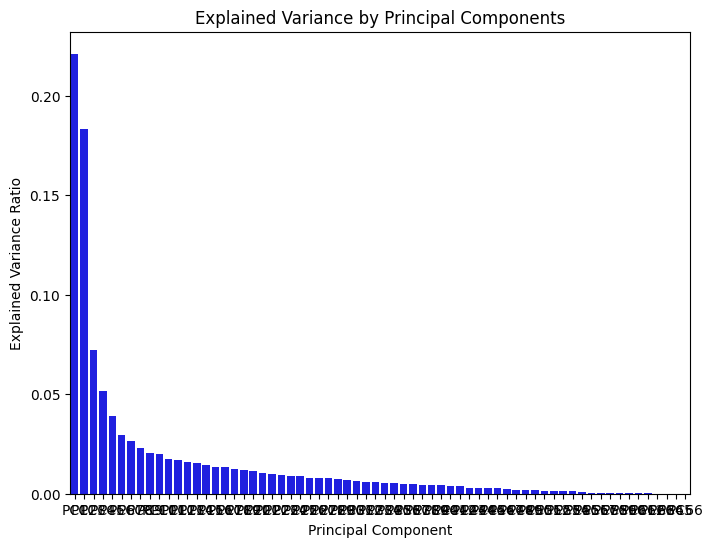

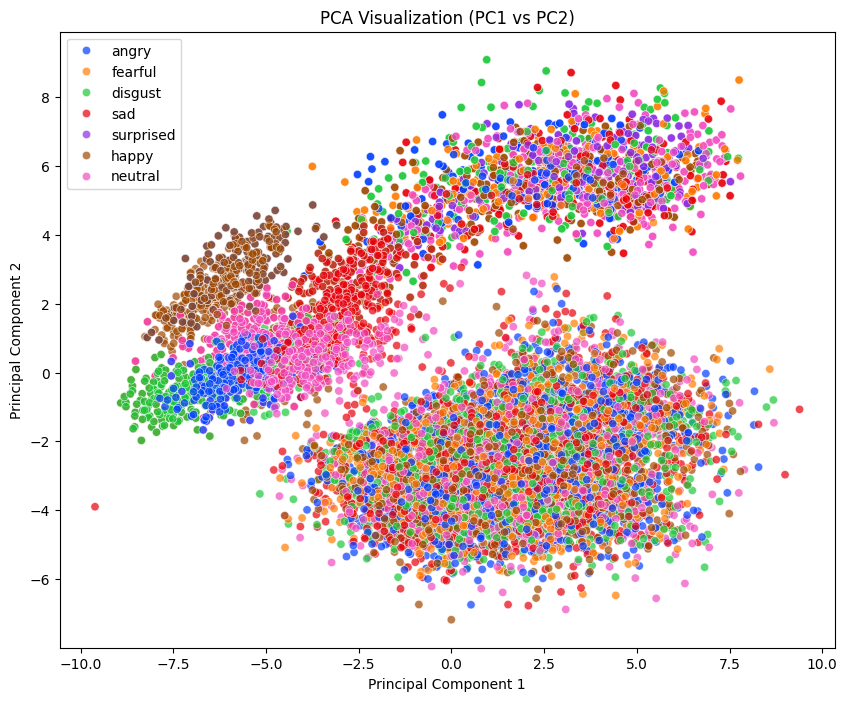

In [104]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ensure seaborn is available for enhanced plots
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# Select only numerical features (drop the Emotion column)
numerical_data = dataset.drop(columns=['Emotion'])

# Standardize the features
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)

# Perform PCA
pca = PCA()
pca_data = pca.fit_transform(standardized_data)

# Create a DataFrame for explained variance
explained_variance = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_
})

# Explained variance plot
plt.figure(figsize=(8, 6))
sns.barplot(x=explained_variance['Principal Component'], y=explained_variance['Explained Variance Ratio'], color='blue')
plt.title('Explained Variance by Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.show()


# Create a DataFrame for PCA-transformed data
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# Add the Emotion column back for visualization
pca_df['Emotion'] = dataset['Emotion']

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Emotion', data=pca_df, palette='bright', alpha=0.7)
plt.title('PCA Visualization (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.show()




### **Insights from PCA Analysis**

#### **1. Explained Variance by Principal Components**
- **Observation**:
  - The first principal component (PC1) explains the most variance, around 20%.
  - The second principal component (PC2) explains slightly less, followed by a rapid decline in variance explained by subsequent components.
  - Together, the first few components (PC1 and PC2) capture a significant portion of the dataset’s variability.

- **Insights**:
  - Most of the meaningful variation in the data is captured in the first few components. Dimensionality reduction to 2–3 components may suffice for visualization or modeling.
  - Beyond the first few components, the contribution to variance becomes negligible, indicating that the majority of information is contained within a small subset of the components.

#### **2. PCA Scatter Plot (PC1 vs PC2)**
- **Observation**:
  - The scatter plot shows clusters of points, with some overlap between emotions.
  - Certain emotions like `angry`, `sad`, and `neutral` form distinct regions, while others like `happy` and `surprised` show more overlap.
  - PC1 separates clusters horizontally, and PC2 adds vertical differentiation.

- **Insights**:
  - The clustering indicates that PCA successfully captures emotional distinctions in the feature space.
  - Emotions like `angry` and `sad` may be more easily separable based on their distinct clusters.
  - Overlapping clusters (e.g., `happy` and `surprised`) suggest these emotions share similar acoustic features, making them harder to distinguish.

## Feature Importance Analysis

              precision    recall  f1-score   support

       angry       0.75      0.80      0.77       464
     disgust       0.67      0.71      0.69       500
     fearful       0.64      0.35      0.45       322
       happy       0.69      0.72      0.70       488
     neutral       0.71      0.72      0.72       518
         sad       0.69      0.77      0.73       493
   surprised       0.90      0.93      0.91        80

    accuracy                           0.70      2865
   macro avg       0.72      0.71      0.71      2865
weighted avg       0.70      0.70      0.70      2865



/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/920786129.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


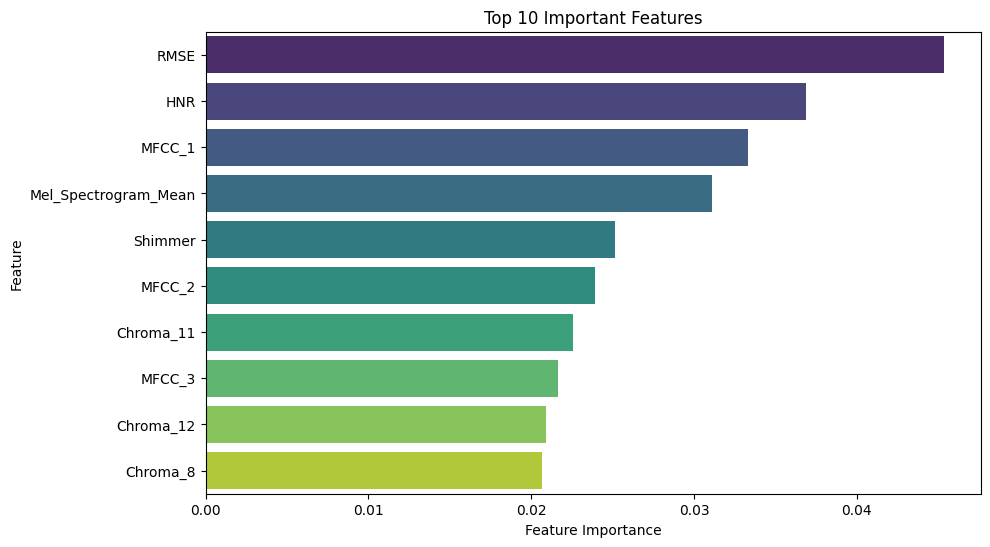

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the dataset into features (X) and labels (y)
X = dataset.drop(columns=['Emotion'])
y = dataset['Emotion']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test set (optional, to check performance)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


# Extract feature importance
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()



### **Insights from Feature Importance Analysis**

#### **Top Features**:
1. **`RMSE`** (Root Mean Square Energy):
   - Most important feature for emotion classification.
   - Indicates the energy of the signal, likely correlating with the intensity of emotions such as `angry` (high energy) versus `neutral` or `sad` (low energy).

2. **`HNR`** (Harmonic-to-Noise Ratio):
   - Reflects voice quality, with higher values indicating more harmonic content.
   - Likely helps distinguish emotions with clear speech (`neutral`, `happy`) from noisier ones (`angry`, `fearful`).

3. **`MFCC_1`** and **`MFCC_2`**:
   - These are fundamental coefficients that capture key timbre and pitch-related characteristics of speech.
   - Likely essential for distinguishing emotions with distinct vocal timbre, such as `happy` and `sad`.

4. **`Mel_Spectrogram_Mean`**:
   - Captures overall spectral energy distribution, which aligns with vocal tone and intensity.
   - Helps differentiate between emotions like `angry` (higher energy) and `neutral` (lower energy).

5. **`Shimmer`**:
   - Indicates amplitude variations, important for capturing emotional nuances like `happy` and `surprised`, which might involve more fluctuation.

6. **Chroma Features** (`Chroma_11`, `Chroma_12`, `Chroma_8`):
   - Represent pitch class distributions.
   - Likely helpful for distinguishing emotions involving tonal pitch differences (e.g., `happy` and `surprised`).

#### **Classification Performance**:
1. **Overall Accuracy**: 
   - **70%**, which is decent for a baseline model without fine-tuning.
   - Indicates the feature set is moderately effective for distinguishing emotions.

2. **Class-Specific Observations**:
   - **High Performance**: 
     - `angry` (77% F1-score), `sad` (73% F1-score), and `surprised` (91% F1-score).
     - These emotions have distinct acoustic features that the model identifies well.
   - **Low Performance**:
     - `fearful` (45% F1-score): Likely overlaps significantly with other emotions like `angry` or `sad`.
     - Suggests further refinement in feature extraction or additional features for this class.

3. **Macro vs. Weighted Averages**:
   - Macro averages are close to weighted averages, indicating a reasonably balanced model with no major bias toward dominant classes.

---

### **Next Steps**:
1. **Refine Features**:
   - Focus on the top features (`RMSE`, `HNR`, `MFCCs`) for further analysis or dimensionality reduction.
   - Consider excluding less important features to simplify the model.

2. **Class Balancing**:
   - Address underperformance in `fearful` by investigating its overlap with other emotions and exploring additional features (e.g., temporal or prosodic features).

3. **Alternative Models**:
   - Explore models like Gradient Boosting or XGBoost for improved performance.

4. **Fine-Tuning**:
   - Use hyperparameter tuning (e.g., grid search or random search) to optimize the Random Forest model.

## Distribution Analysis

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/871991995.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y=feature, data=dataset, palette='Set2')


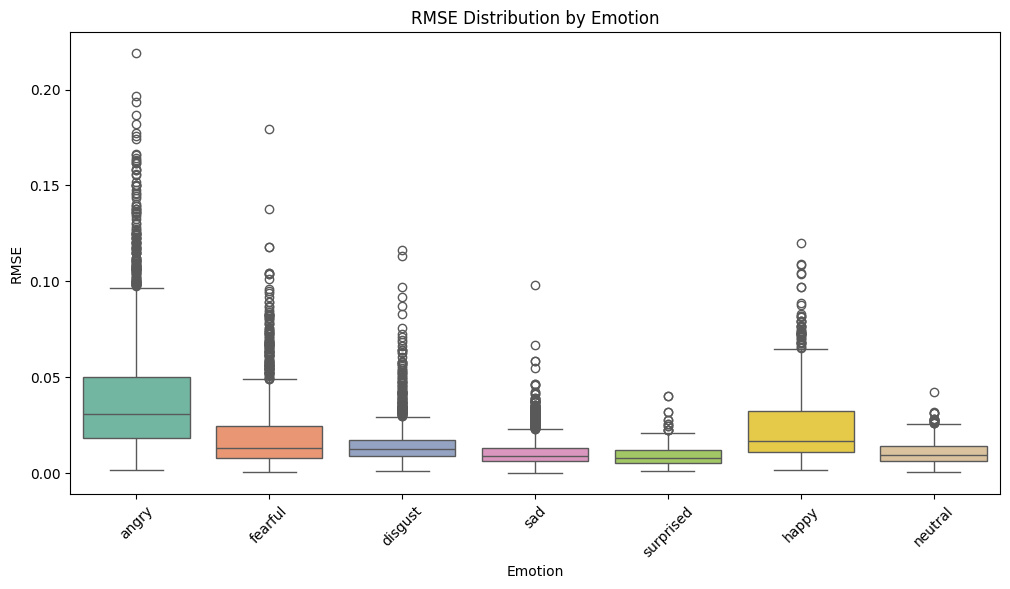

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/871991995.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y=feature, data=dataset, palette='Set2')


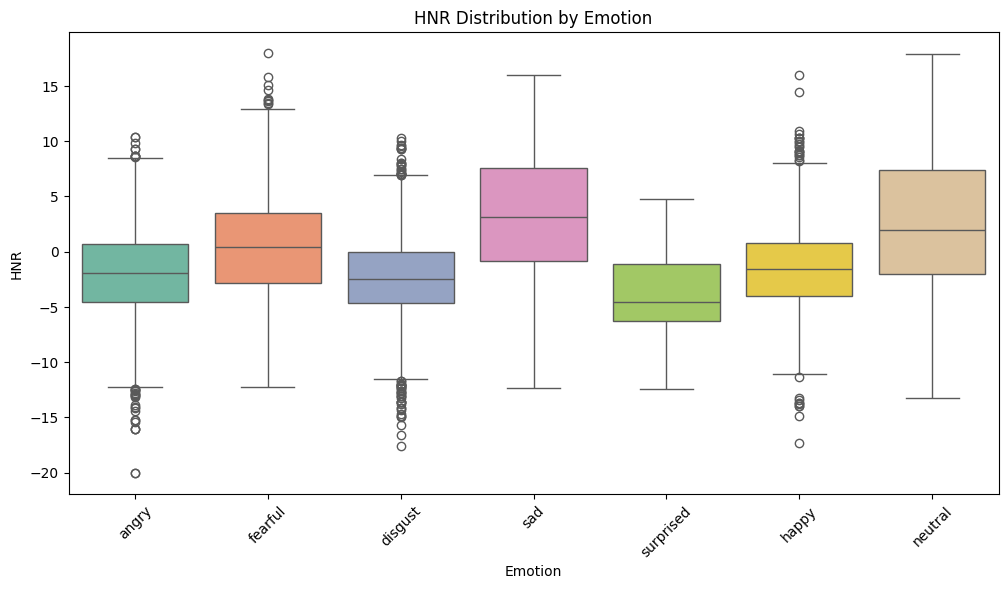

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/871991995.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y=feature, data=dataset, palette='Set2')


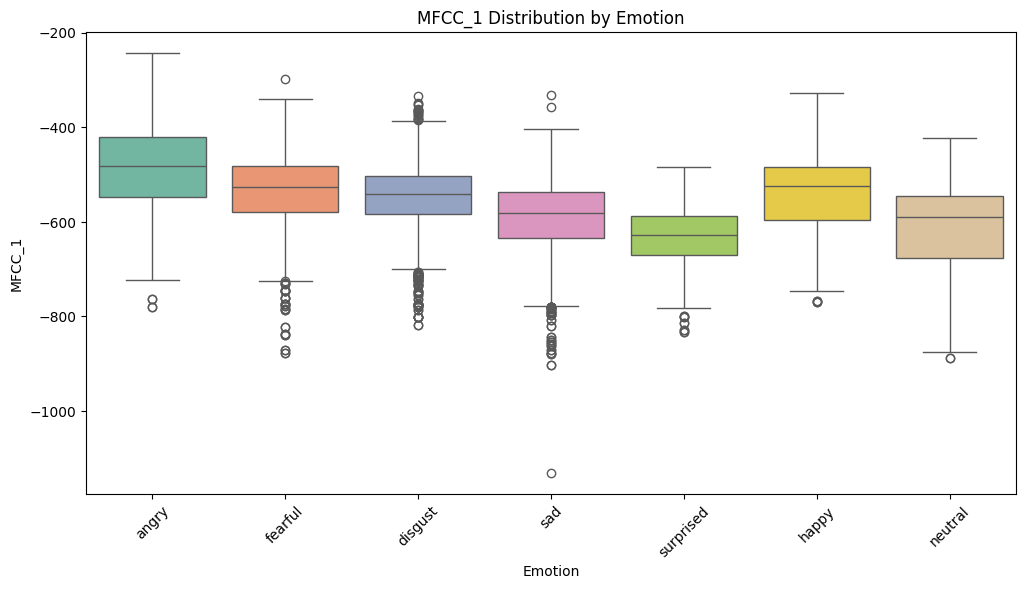

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/871991995.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y=feature, data=dataset, palette='Set2')


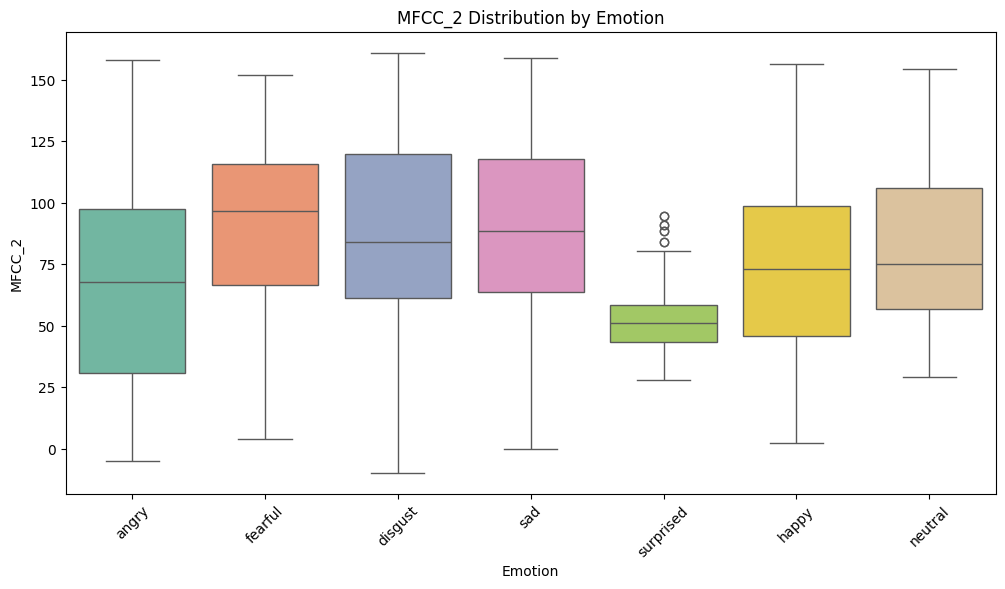

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/871991995.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y=feature, data=dataset, palette='Set2')


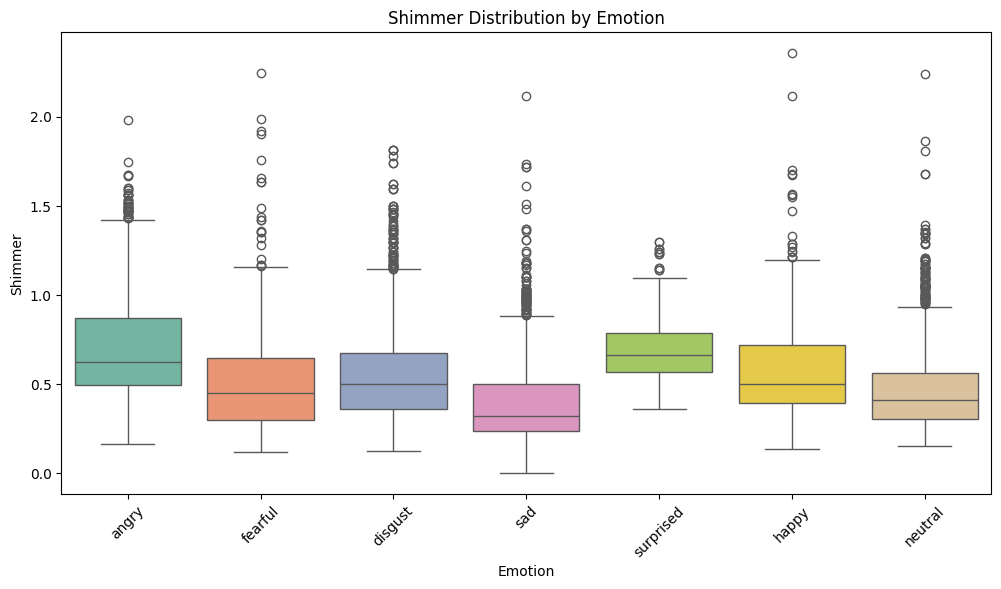

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/871991995.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y=feature, data=dataset, palette='Set2')


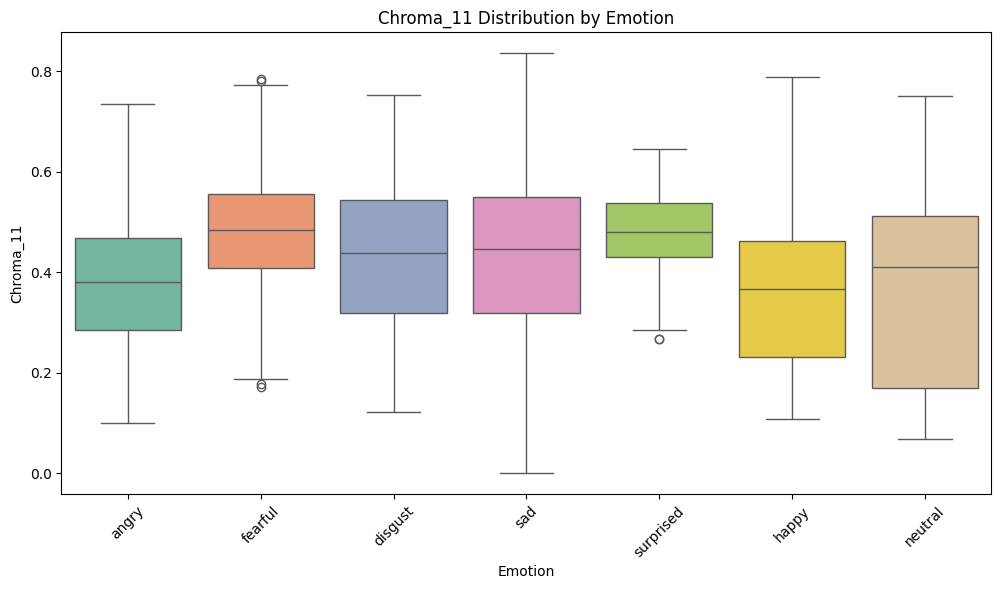

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/871991995.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y=feature, data=dataset, palette='Set2')


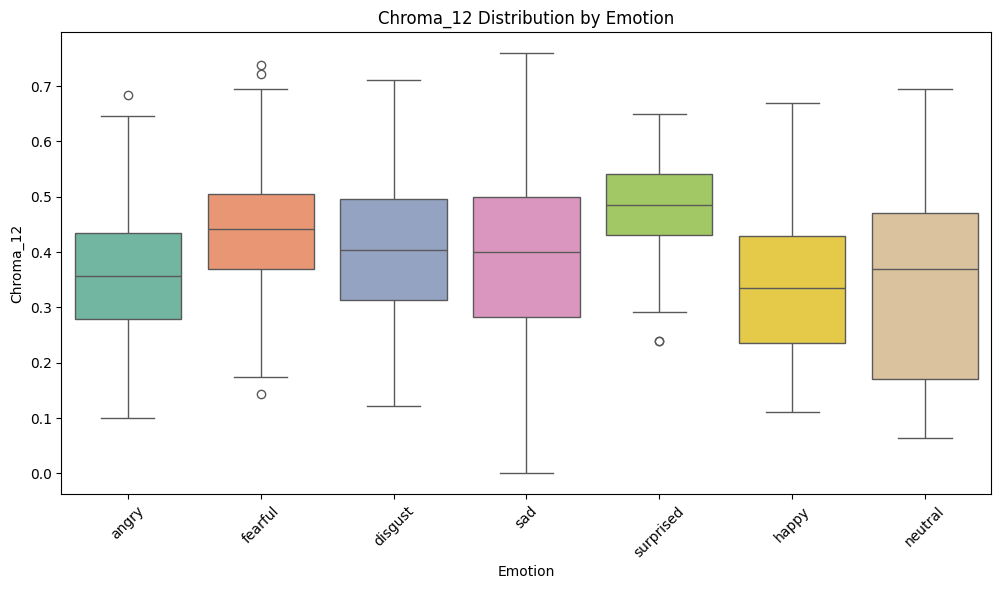

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/871991995.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y=feature, data=dataset, palette='Set2')


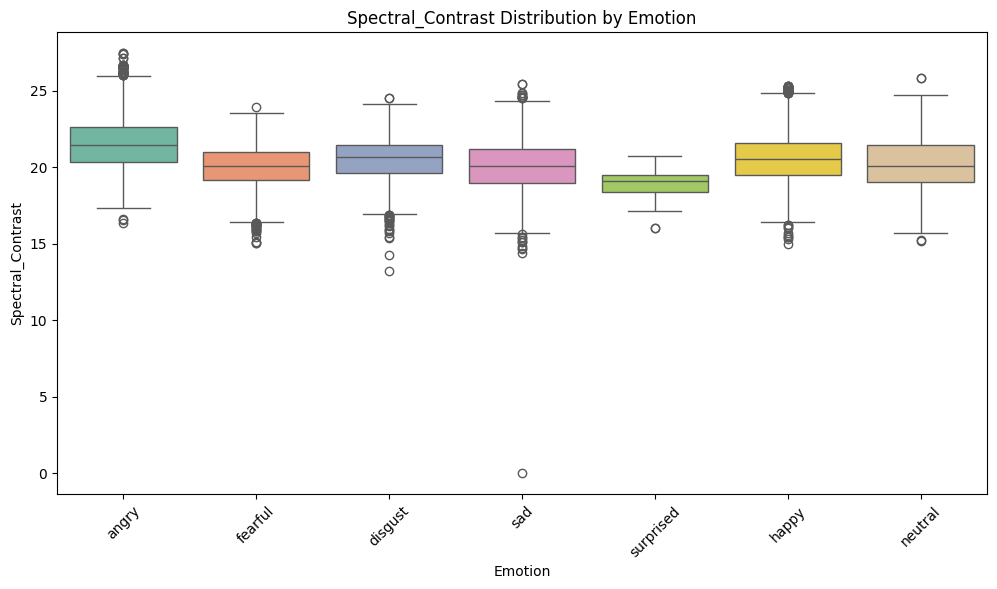

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to analyze
features_to_analyze = ['RMSE', 'HNR', 'MFCC_1', 'MFCC_2', 'Shimmer', 
                       'Chroma_11', 'Chroma_12', 'Spectral_Contrast']

# Plot feature distributions by emotion
for feature in features_to_analyze:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Emotion', y=feature, data=dataset, palette='Set2')
    plt.title(f"{feature} Distribution by Emotion")
    plt.xlabel("Emotion")
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.show()


### **Insights from Feature Distribution by Emotion**

#### **1. RMSE (Root Mean Square Energy)**
- **Key Observations**:
  - `angry` and `happy` emotions have a higher median and wider range of RMSE, indicating more energy in their speech signals.
  - `neutral` and `sad` have lower RMSE values, reflecting calmer or less energetic speech.
  - Outliers exist in all emotions but are more prominent in `angry` and `happy`.

- **Insight**:
  - RMSE effectively differentiates between high-energy emotions (`angry`, `happy`) and low-energy emotions (`sad`, `neutral`).

---

#### **2. HNR (Harmonic-to-Noise Ratio)**
- **Key Observations**:
  - `neutral` and `happy` have higher HNR, indicating clearer speech with more harmonic content.
  - `fearful` and `angry` exhibit lower HNR values, reflecting noisier speech.
  - The distribution for `sad` is centered but shows significant variance.

- **Insight**:
  - HNR captures voice clarity differences, distinguishing between clear speech (e.g., `neutral`) and noisy or less harmonic emotions (`angry`, `fearful`).

---

#### **3. MFCC_1**
- **Key Observations**:
  - `angry`, `happy`, and `neutral` have higher MFCC_1 values, indicating different timbre characteristics.
  - `sad` and `disgust` have lower median values, with tighter distributions compared to `happy`.
  - Significant overlap exists between some emotions, like `fearful` and `disgust`.

- **Insight**:
  - MFCC_1 captures timbre and tonal differences, particularly for `angry` and `happy` emotions, while `sad` and `disgust` are less distinct.

---

#### **4. MFCC_2**
- **Key Observations**:
  - `angry` has a wider spread with lower values compared to other emotions.
  - `surprised` has the narrowest distribution, potentially indicating less tonal variability.
  - `neutral` and `happy` exhibit overlapping distributions but higher median values compared to `sad` and `fearful`.

- **Insight**:
  - MFCC_2 helps identify emotions like `angry` (lower values) and `surprised` (less tonal variability), but some overlap reduces separation for other classes.

---

#### **5. Shimmer**
- **Key Observations**:
  - `happy` and `angry` exhibit higher shimmer, reflecting greater amplitude variations.
  - `sad` and `neutral` have relatively lower shimmer values, indicating steadier speech signals.
  - `fearful` shows a wide range of shimmer values, suggesting variability in emotional expression.

- **Insight**:
  - Shimmer effectively captures amplitude variations, differentiating expressive emotions (`happy`, `angry`) from subdued ones (`neutral`, `sad`).

---

#### **6. Chroma_11 and Chroma_12**
- **Key Observations**:
  - `happy` and `surprised` show slightly higher chroma values, indicating tonal pitch differences.
  - `neutral`, `sad`, and `angry` have overlapping distributions, with less variation.
  - `fearful` exhibits the tightest chroma range.

- **Insight**:
  - Chroma features provide limited differentiation but may help in separating tonal emotions (`happy`, `surprised`) from non-tonal ones (`neutral`, `sad`).

---

#### **7. Spectral Contrast**
- **Key Observations**:
  - `angry` and `happy` exhibit higher spectral contrast, reflecting more energy variability across frequencies.
  - `neutral` and `sad` show tighter distributions with lower spectral contrast values.
  - `surprised` has distinct outliers but a centered distribution.

- **Insight**:
  - Spectral contrast effectively separates energetic emotions (`angry`, `happy`) from calmer ones (`neutral`, `sad`).

---

### **General Insights**
- **Feature Relevance**:
  - `RMSE`, `HNR`, and `MFCC_1` are the most distinct across emotions.
  - `Shimmer` and `Spectral Contrast` also provide meaningful separation for expressive emotions.

- **Challenges**:
  - Overlaps in features like `Chroma` and `MFCC_2` suggest challenges in distinguishing certain emotions (e.g., `fearful` and `disgust`).

- **Next Steps**:
  - Focus on top-performing features for modeling.
  - Investigate combining features (e.g., `HNR` and `Shimmer`) for improved separation of overlapping emotions.

## K-Means Clustering

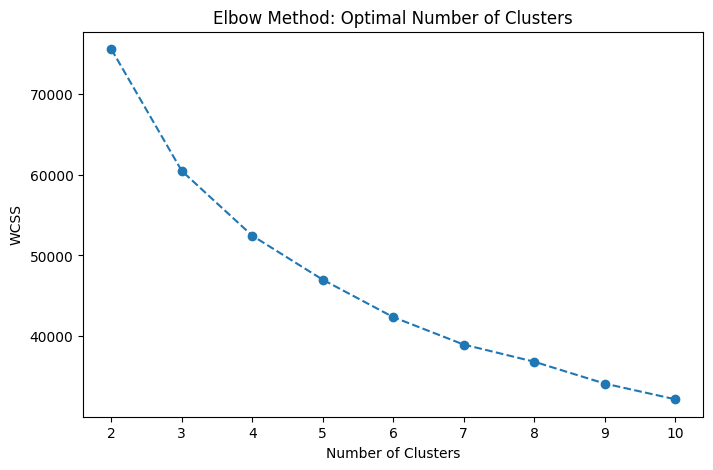

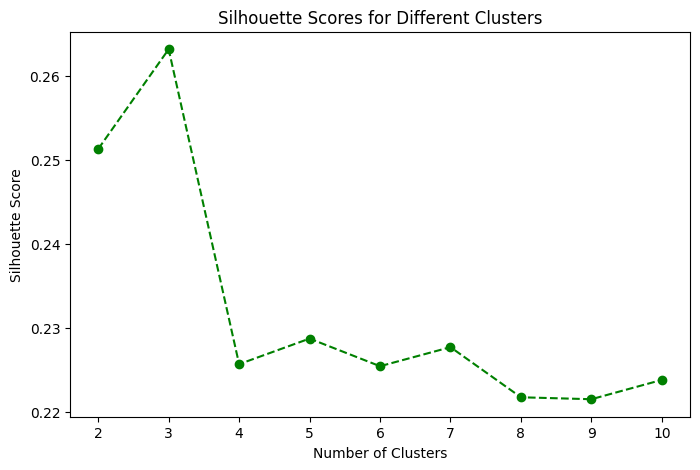

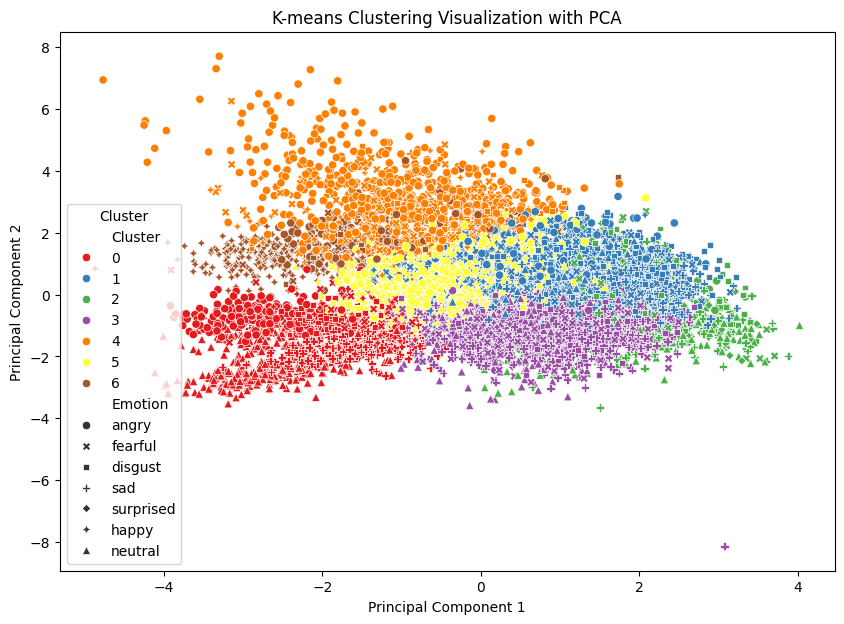

Cluster-Emotion Distribution:
Emotion  angry  disgust  fearful  happy  neutral    sad  surprised
Cluster                                                           
0        404.0    129.0     26.0  137.0    809.0  750.0        0.0
1        271.0    747.0    605.0  421.0    448.0  600.0       22.0
2        120.0    308.0    175.0  197.0    511.0  329.0      292.0
3         53.0    280.0    390.0  319.0    534.0  661.0       10.0
4        724.0     62.0    157.0  125.0      0.0    6.0        0.0
5        408.0    909.0    273.0  837.0    159.0  108.0       60.0
6        475.0     20.0     29.0  419.0      2.0    1.0        0.0


In [107]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select Features for Clustering
features_for_clustering = ['RMSE', 'HNR', 'MFCC_1', 'Shimmer', 
                            'Spectral_Contrast', 'Chroma_11', 'Chroma_12']

# Extract selected features
X = dataset[features_for_clustering]

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Determine Optimal Number of Clusters (Elbow Method)
wcss = []  # Within-cluster sum of squares
for i in range(2, 11):  # Test cluster numbers from 2 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 4: Evaluate Silhouette Scores
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='green')
plt.title('Silhouette Scores for Different Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Step 5: Apply K-means Clustering with Optimal Clusters
optimal_clusters = 7  # Based on elbow method or silhouette score
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add Cluster Labels to the Dataset
dataset['Cluster'] = clusters

# Step 6: Visualize Clusters with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dataset['Cluster'], palette='Set1', style=dataset['Emotion'])
plt.title('K-means Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 7: Analyze Cluster Distribution
cluster_counts = dataset.groupby(['Cluster', 'Emotion']).size().unstack().fillna(0)
print("Cluster-Emotion Distribution:")
print(cluster_counts)


### Insights from K-means Clustering:

#### **1. Elbow Method:**
- The **Elbow Method** suggests a gradual decrease in WCSS (Within-Cluster Sum of Squares) as the number of clusters increases.
- A clear "elbow" isn't evident, but **3 or 4 clusters** appear to be reasonable choices where the decrease in WCSS slows significantly.

#### **2. Silhouette Scores:**
- The **Silhouette Score** peaks at **3 clusters**, indicating that this is the most optimal number of clusters in terms of cluster separation and cohesion.
- Scores decrease after 3 clusters, suggesting diminishing returns with higher cluster counts.

#### **3. PCA Visualization of Clusters:**
- **Cluster Separation:**
  - Clusters are fairly well-separated in the PCA visualization, but there is some overlap.
  - Clusters 0 and 1 seem to dominate the space, with noticeable separation in specific areas.
  - Cluster 6 seems distinct but sparse, likely aligning with specific emotions like "surprised."

- **Emotion Overlap:**
  - Emotions like **"angry"** and **"sad"** align more closely with certain clusters, while others like **"neutral"** and **"happy"** are spread across multiple clusters.
  - **"Surprised"** seems to align well with one cluster, indicating strong distinctiveness for this emotion.
  - Overlap between **"fearful"**, **"disgust"**, and other emotions is evident, showing that clustering struggles to fully distinguish these.

#### **4. Key Observations:**
- **Cluster Distribution:**
  - Some emotions are more evenly distributed across clusters (e.g., "neutral"), reflecting their less distinctive feature profiles.
  - Others, like "surprised," are more localized, indicating unique characteristics.

- **Challenges:**
  - Overlapping clusters highlight the difficulty in separating certain emotions based solely on the chosen features.
  - Emotions like "fearful" and "disgust" might benefit from additional features or domain-specific preprocessing.

#### **Next Steps:**
1. **Interpretation of Clusters:**
   - Evaluate how well each cluster aligns with known emotion labels. This will help validate whether K-means is capturing meaningful groupings.
2. **Feature Importance:**
   - Reassess feature contributions to clustering and potentially refine the feature set.
3. **Comparison with Supervised Models:**
   - Since clustering is unsupervised, compare results with a supervised model to see how well emotions can be predicted.

## Pairplot Analysis


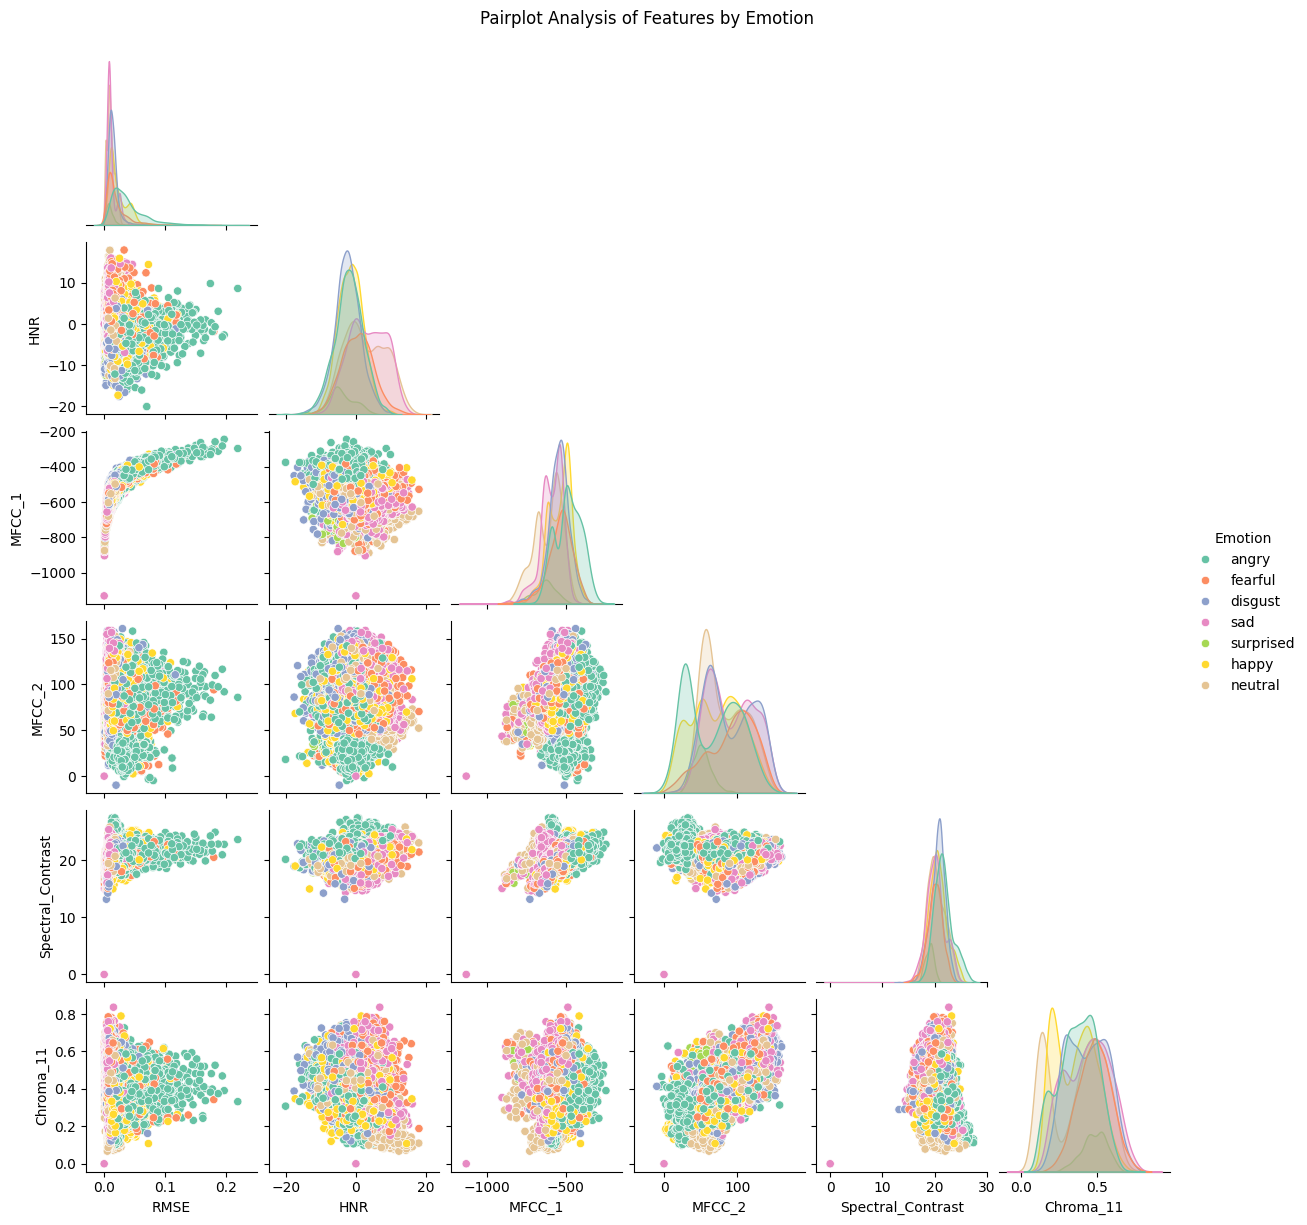

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of features for pairplot
selected_features = ['RMSE', 'HNR', 'MFCC_1', 'MFCC_2', 'Spectral_Contrast', 'Chroma_11']

# Add Emotion labels to the subset
pairplot_data = dataset[selected_features + ['Emotion']]

# Create pairplot
sns.pairplot(pairplot_data, hue='Emotion', palette='Set2', diag_kind='kde', corner=True, height=2)
plt.suptitle("Pairplot Analysis of Features by Emotion", y=1.02)
plt.show()



From the pairplot visualization:

### **Diagonal KDEs (Kernel Density Estimates):**
- **RMSE**:
  - Distinct distributions for `angry` and `happy`, with `angry` showing higher values on average.
  - Overlaps for emotions like `neutral` and `fearful`.
- **HNR**:
  - Clear separation for `neutral`, which has higher HNR values on average.
  - `sad` and `fearful` overlap but trend lower in HNR compared to other emotions.
- **MFCC_1**:
  - Good differentiation, especially for `angry` and `neutral`, which cluster at different ranges.
- **MFCC_2**:
  - `surprised` is distinctly separated with lower values compared to other emotions.
- **Spectral_Contrast**:
  - Shows separation, with `angry` and `happy` having higher values.
- **Chroma_11**:
  - Overlap across most emotions but shows some separation for `neutral`.

### **Pairwise Scatter Plots:**
- **RMSE vs. HNR**:
  - `neutral` clusters at higher HNR and lower RMSE values, creating a visible distinction.
  - `angry` spreads across high RMSE and moderate HNR, showing some unique patterns.
- **MFCC_1 vs. MFCC_2**:
  - Strong clustering for `surprised`, with other emotions overlapping.
  - `angry` and `neutral` appear at distinct ranges of MFCC_1, aiding in separation.
- **Spectral_Contrast vs. RMSE**:
  - `angry` and `happy` tend to cluster at higher Spectral_Contrast and RMSE values.
- **Chroma_11 with others**:
  - `neutral` has distinct trends, clustering around mid-values.

### **Insights:**
1. **Neutral**: Frequently separates well in features like **HNR**, **MFCC_1**, and **Chroma_11**.
2. **Angry**: Shows higher values in **RMSE** and **Spectral_Contrast**, making it distinguishable.
3. **Surprised**: Clear separation in **MFCC_2** and spreads differently in **MFCC_1 vs. MFCC_2**.
4. **Fearful and Sad**: Often overlap but trend toward lower HNR and RMSE values.

### **Implications:**
- The selected features show clear patterns for some emotions like `angry`, `neutral`, and `surprised`.
- Overlaps exist for others like `sad` and `fearful`, indicating possible challenges in classification.

## Outlier Detection using Z-Score

Number of outliers detected: 2977

Outliers by Emotion:
Emotion
angry        774
sad          535
neutral      474
disgust      473
happy        325
fearful      314
surprised     82
Name: count, dtype: int64
Cleaned dataset saved to 'Dataset/cleaned_dataset.csv'


/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/3907558939.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y='Duration', data=dataset, palette='Set2')


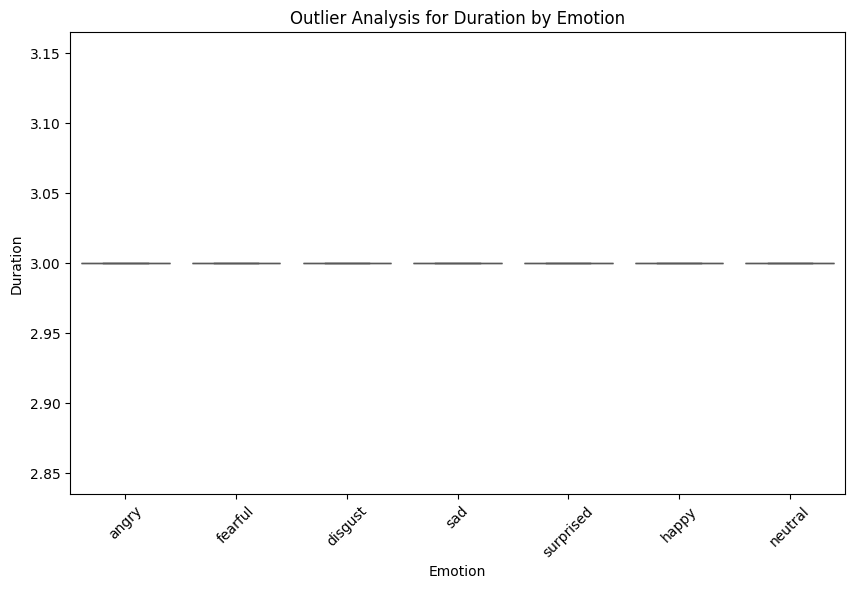

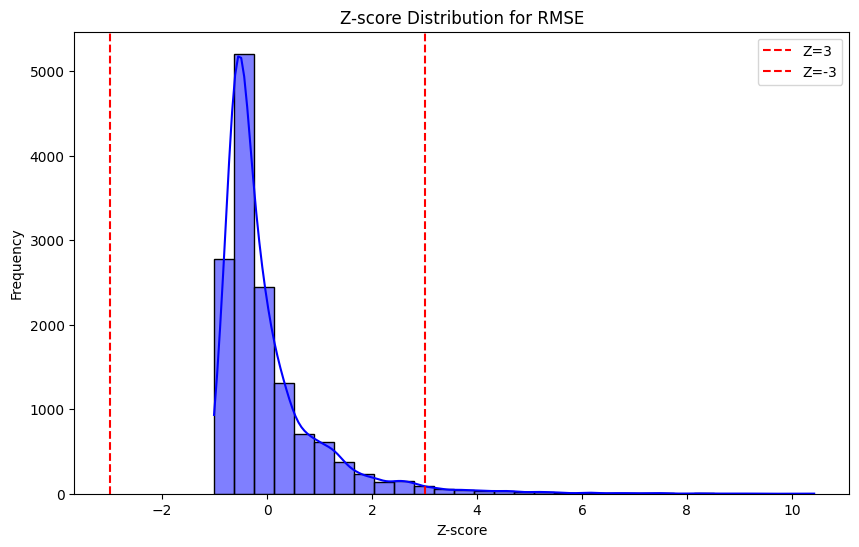

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Z-scores for all numerical features
numerical_features = dataset.drop(columns=['Emotion']).columns
z_scores = (dataset[numerical_features] - dataset[numerical_features].mean()) / dataset[numerical_features].std()

# Identify outliers (Z-score > 3 or < -3)
outliers = (z_scores.abs() > 3).any(axis=1)

# Print summary of outliers
print(f"Number of outliers detected: {outliers.sum()}")
print("\nOutliers by Emotion:")
print(dataset[outliers]['Emotion'].value_counts())

# Create a dataset with and without outliers
dataset_outliers = dataset[outliers]
dataset_cleaned = dataset[~outliers]

# Save the cleaned dataset to a file if needed
dataset_cleaned.to_csv("Dataset/cleaned_dataset.csv", index=False)
print("Cleaned dataset saved to 'Dataset/cleaned_dataset.csv'")

# Visualize outliers for a specific feature (e.g., Duration)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Emotion', y='Duration', data=dataset, palette='Set2')
plt.title("Outlier Analysis for Duration by Emotion")
plt.xlabel("Emotion")
plt.ylabel("Duration")
plt.xticks(rotation=45)
plt.show()

# Optional: Visualize overall Z-score distributions for a specific feature (e.g., RMSE)
feature_to_visualize = "RMSE"
plt.figure(figsize=(10, 6))
sns.histplot(z_scores[feature_to_visualize], bins=30, kde=True, color='blue')
plt.title(f"Z-score Distribution for {feature_to_visualize}")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.axvline(x=3, color='red', linestyle='--', label='Z=3')
plt.axvline(x=-3, color='red', linestyle='--', label='Z=-3')
plt.legend()
plt.show()


### Insights from Outlier Detection

#### General Insights:
1. **Outliers Detected**: A total of **2977 outliers** were identified across the dataset, based on Z-scores greater than 3 or less than -3.

2. **Emotion-wise Outliers**:
   - **Angry** had the highest number of outliers (**774**), indicating variability in the features associated with this emotion.
   - **Sad**, **neutral**, and **disgust** also showed a significant number of outliers, likely due to overlapping feature values with other emotions or extreme values in some features.
   - **Surprised** had the least number of outliers (**82**), possibly indicating more consistent feature values for this emotion.

#### Feature-Specific Observations:
1. **Duration**:
   - The boxplot of `Duration` by emotion reveals no significant variability or extreme outliers because `Duration` was normalized to a constant value of 3 seconds for all audio files during preprocessing. This consistency ensures that the feature does not contribute to outlier behavior.

2. **RMSE (Root Mean Square Energy)**:
   - The histogram of Z-scores for RMSE shows a long tail towards higher values, indicating the presence of some extreme outliers in energy levels across emotions.
   - Most data points fall within the range of Z-scores between -3 and 3, while the red dashed lines mark the thresholds for outliers. A small number of samples have exceptionally high RMSE values, contributing to outliers.

#### Emotion-Based Insights:
1. **Variability in Features**:
   - Emotions like **angry** and **sad** tend to have more outliers, which could indicate greater diversity in how these emotions are expressed across the datasets.
   - **Surprised** shows a much smaller number of outliers, suggesting more uniformity in the feature values for this emotion.

2. **Potential Overlap in Features**:
   - Outliers in **neutral**, **disgust**, and **fearful** may arise from feature overlap with other emotions, making these emotions harder to distinguish during classification.

#### Actionable Insights:
1. **Feature Importance**:
   - Investigate the most important features (e.g., RMSE, MFCC_1, HNR) for their contribution to outlier behavior and variability.
   - Consider removing outliers or applying robust scaling techniques to reduce their impact during model training.

2. **Emotion-Specific Processing**:
   - Tailored feature engineering might help reduce outliers in specific emotions like **angry** or **sad**.
   - For emotions like **surprised**, focus more on consistent feature values as they seem less prone to extreme variations.

3. **Dataset Quality**:
   - Evaluate the data quality for emotions with a high number of outliers, ensuring that these values are not due to noise or preprocessing errors.

## Emotion Pair Comparisons

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


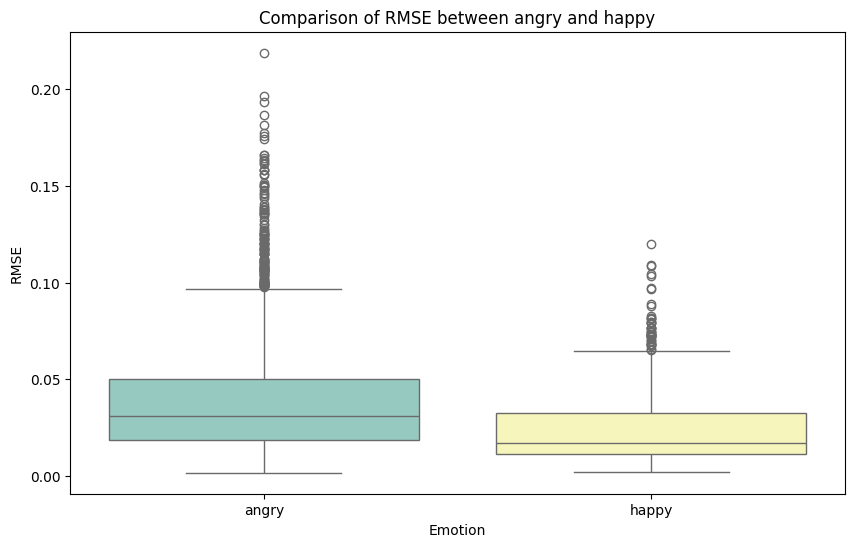

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


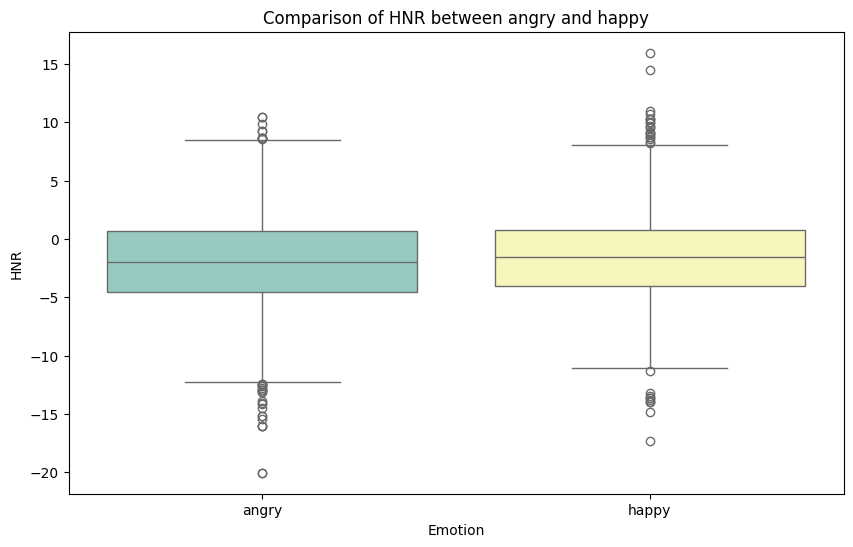

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


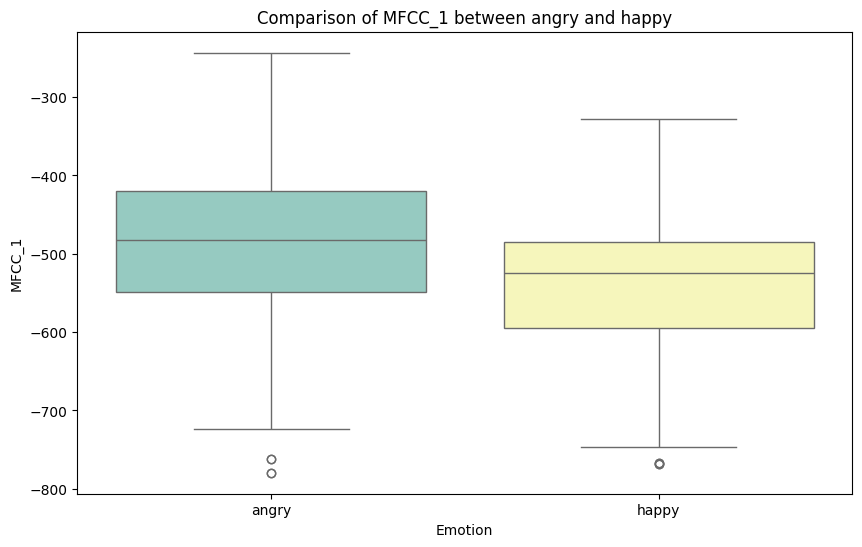

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


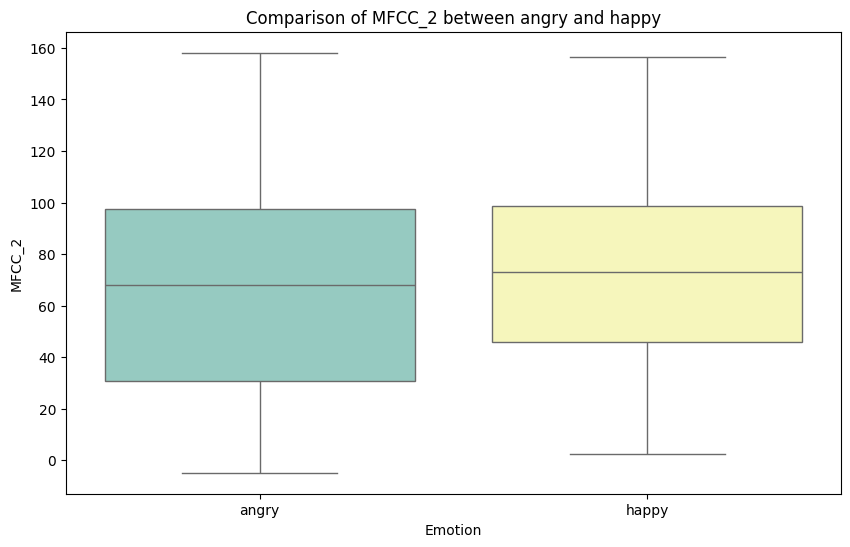

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


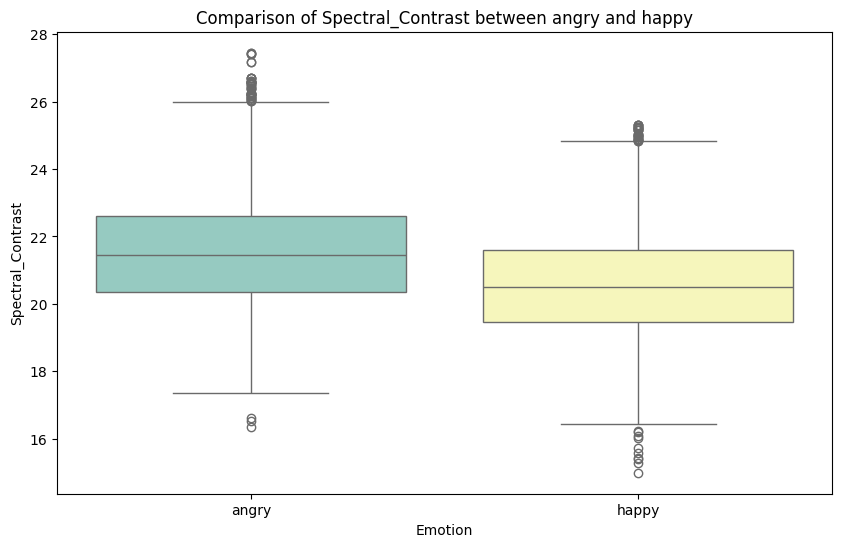

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


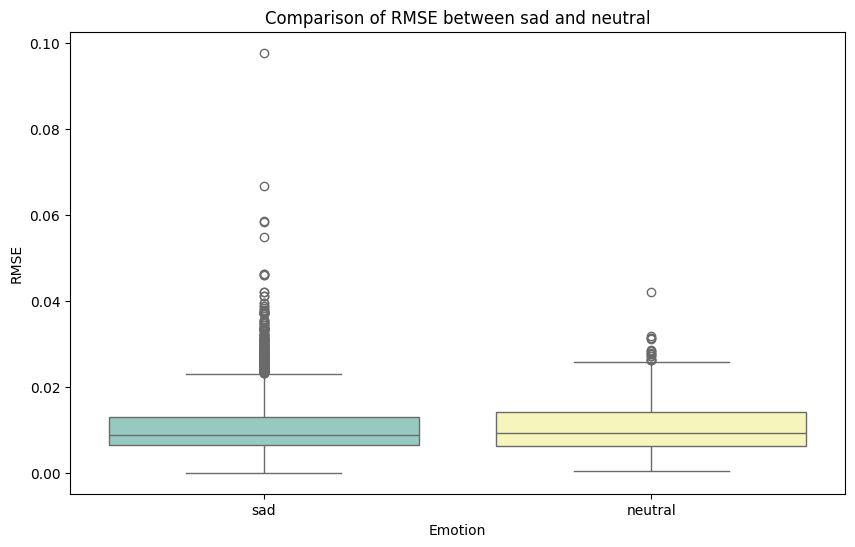

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


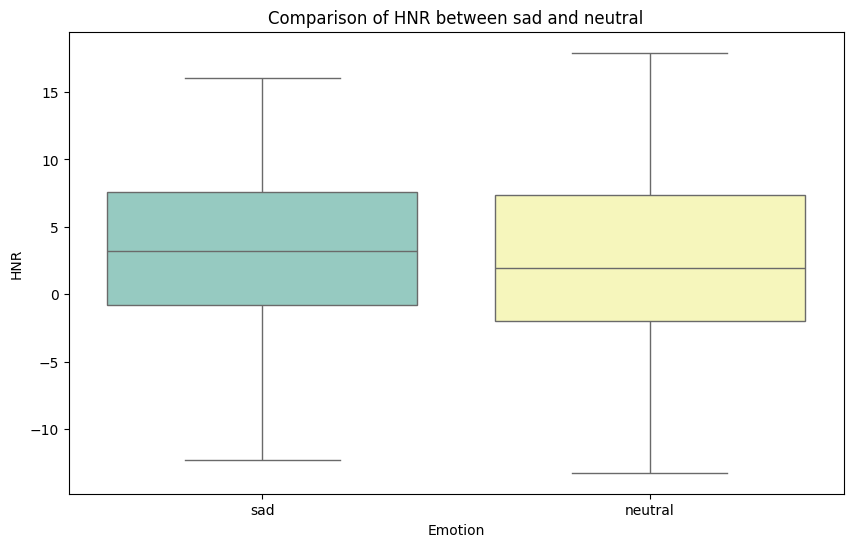

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


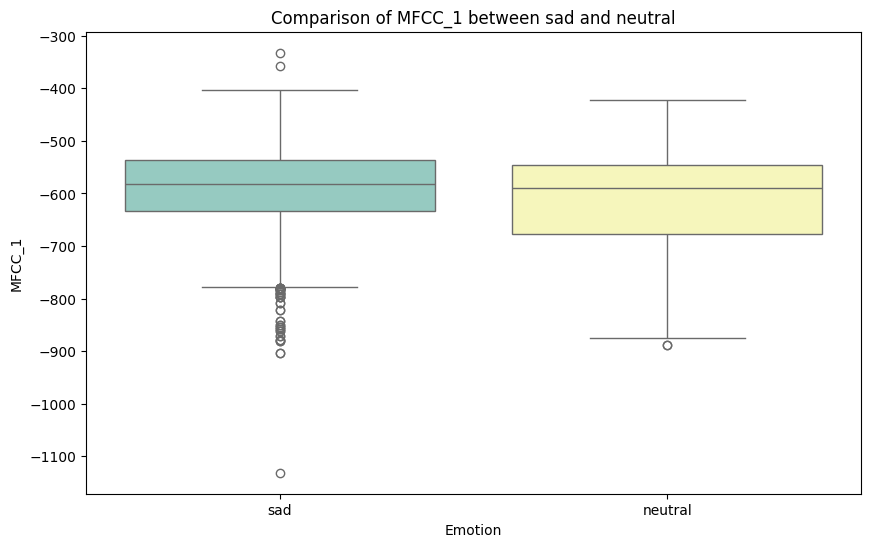

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


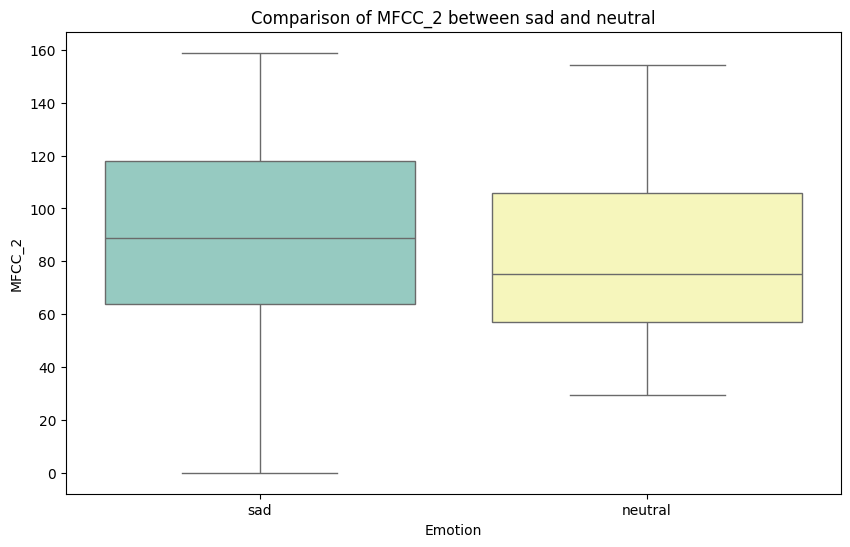

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


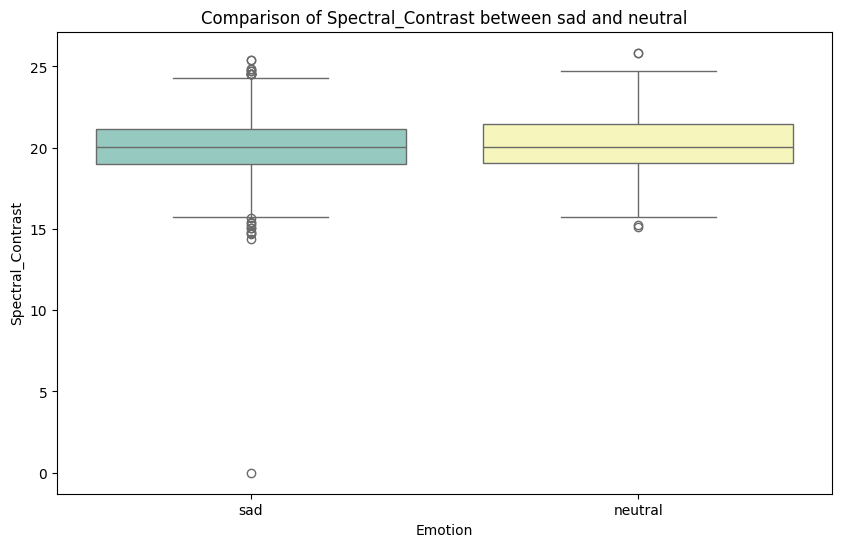

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


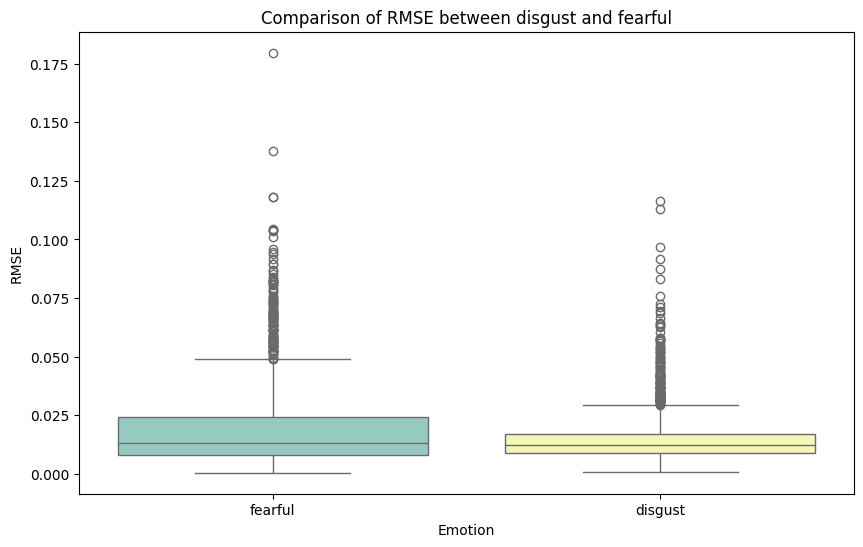

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


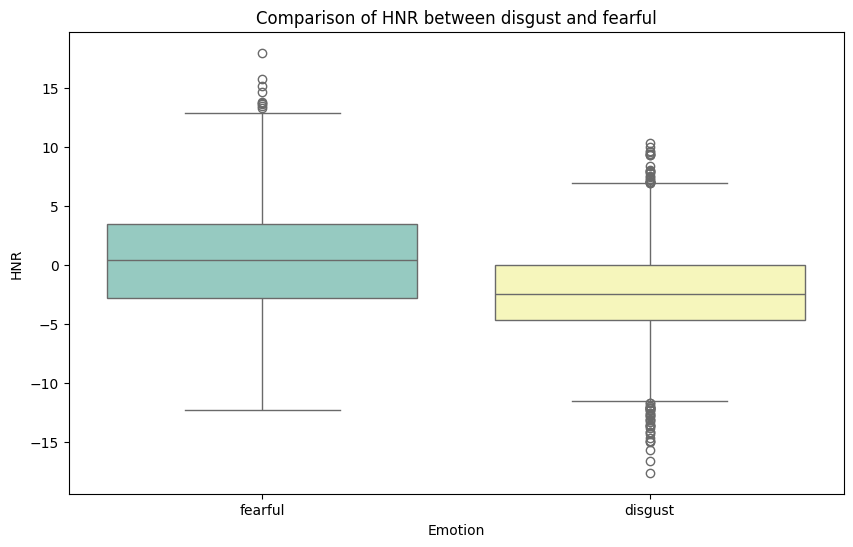

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


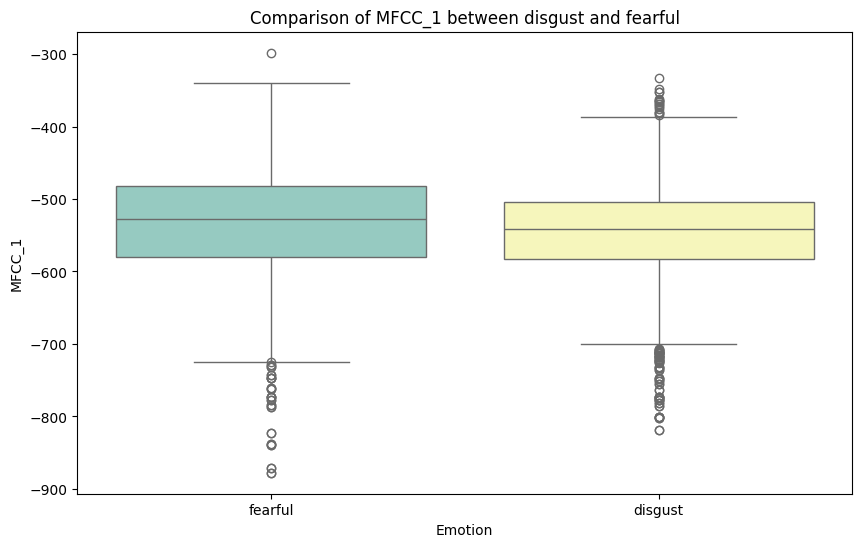

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


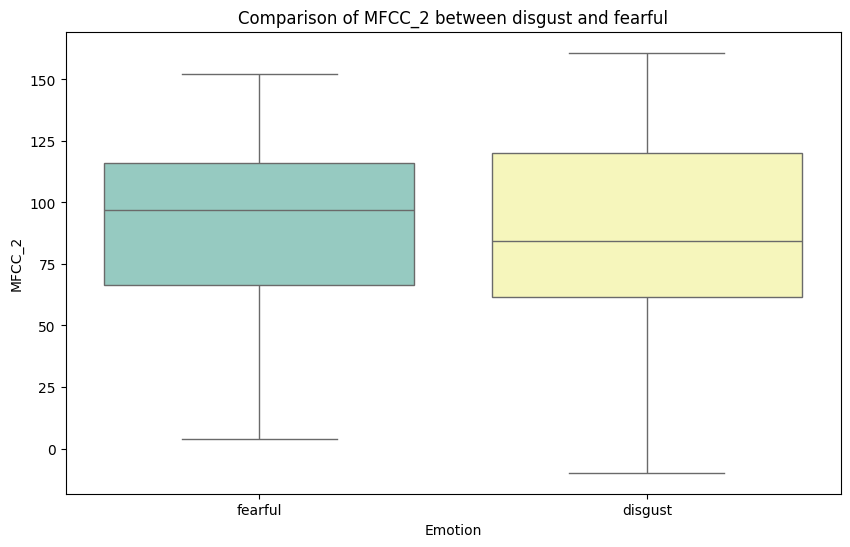

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


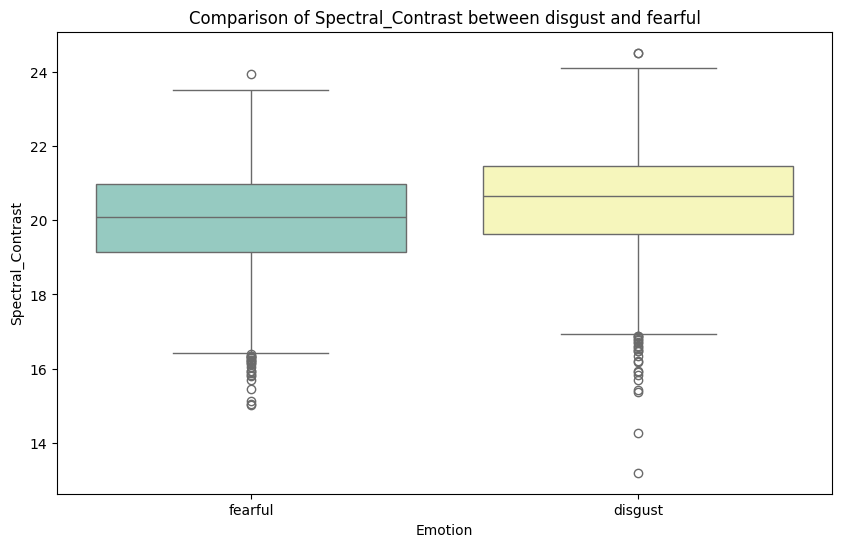

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


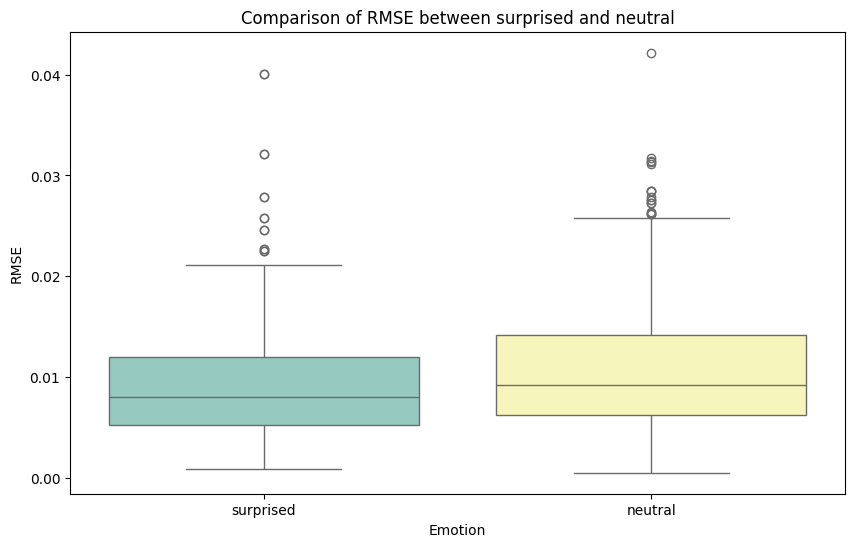

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


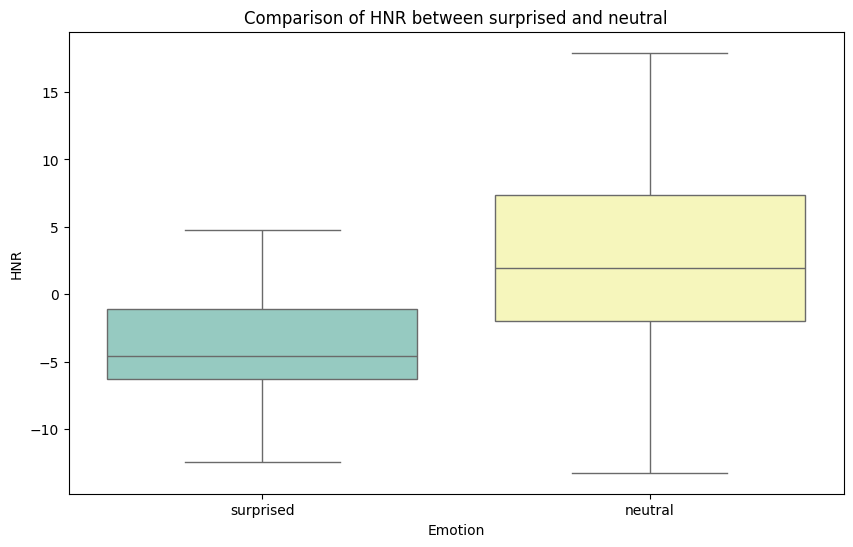

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


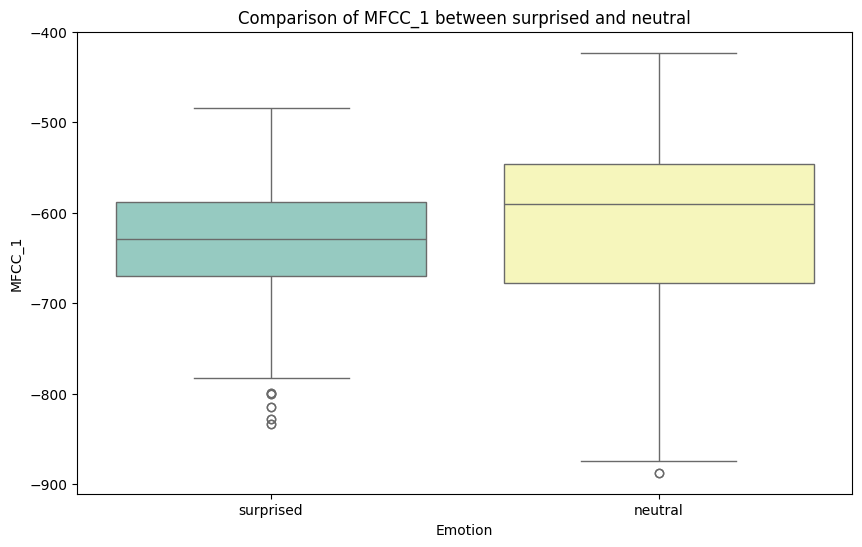

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


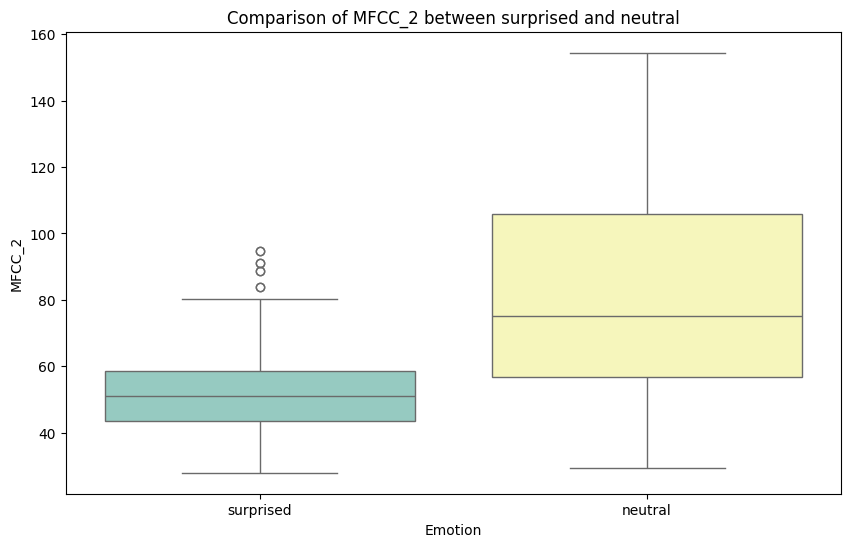

/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1143880633.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")


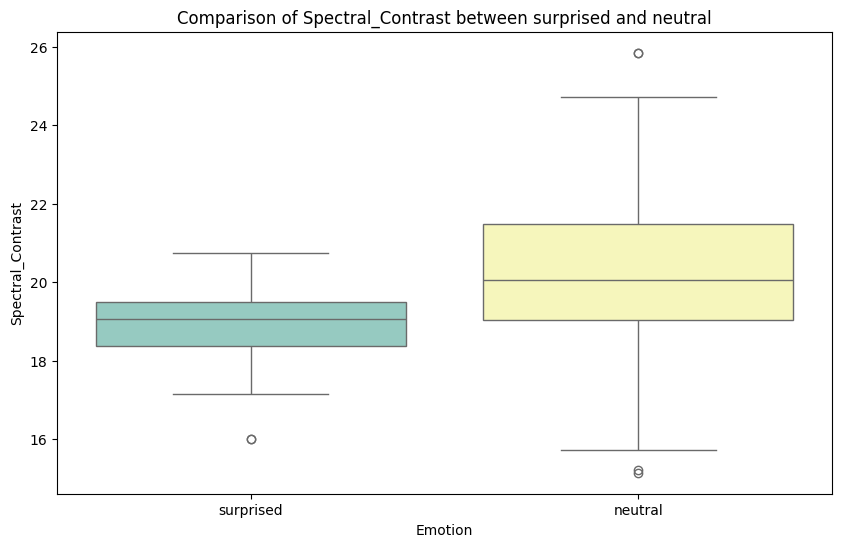

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define emotion pairs for comparison
emotion_pairs = [
    ("angry", "happy"),
    ("sad", "neutral"),
    ("disgust", "fearful"),
    ("surprised", "neutral"),
]

# Features to analyze
features_to_compare = ["RMSE", "HNR", "MFCC_1", "MFCC_2", "Spectral_Contrast"]

# Compare each emotion pair
for emotion1, emotion2 in emotion_pairs:
    subset = dataset[dataset["Emotion"].isin([emotion1, emotion2])]
    
    for feature in features_to_compare:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x="Emotion", y=feature, data=subset, palette="Set3")
        plt.title(f"Comparison of {feature} between {emotion1} and {emotion2}")
        plt.xlabel("Emotion")
        plt.ylabel(feature)
        plt.show()



### Insights from the Emotion Pair Comparisons

The following insights summarize the comparisons across different features (`RMSE`, `HNR`, `MFCC_1`, `MFCC_2`, `Spectral_Contrast`) for the emotion pairs analyzed.

---

### 1. **Angry vs. Happy**
- **RMSE**:
  - Angry shows a wider range of variability compared to Happy.
  - The interquartile range (IQR) for Angry is larger, indicating greater diversity in signal energy levels.
- **HNR**:
  - Both emotions show similar central tendencies, but Angry has a slightly wider range of lower HNR values.
  - Happy has more outliers towards higher HNR values.
- **MFCC_1**:
  - Angry has a broader range of lower coefficients, while Happy is centered around a higher mean.
- **MFCC_2**:
  - The distributions overlap, but Angry is slightly broader.
- **Spectral_Contrast**:
  - Angry exhibits higher overall spectral contrast, while Happy has less variability.

**Insight**: Angry signals are more diverse and energetic compared to Happy, especially in RMSE and spectral characteristics.

---

### 2. **Sad vs. Neutral**
- **RMSE**:
  - Both emotions have similar central tendencies, but Neutral shows a slightly higher spread in values.
- **HNR**:
  - Neutral exhibits higher median values and greater variability, indicating cleaner harmonic structures.
- **MFCC_1**:
  - Sad has a lower median value and more negative coefficients, while Neutral is more stable and higher.
- **MFCC_2**:
  - Sad has a higher range compared to Neutral, which shows a tighter spread.
- **Spectral_Contrast**:
  - Neutral shows higher spectral contrast with fewer outliers.

**Insight**: Neutral signals are cleaner with less noise (higher HNR), while Sad signals are lower in energy and frequency range.

---

### 3. **Fearful vs. Disgust**
- **RMSE**:
  - Fearful exhibits higher variability and outliers, while Disgust is more tightly distributed.
- **HNR**:
  - Disgust shows a higher median HNR, indicating more harmonic clarity, while Fearful exhibits greater variability.
- **MFCC_1**:
  - Fearful tends towards lower coefficients, while Disgust remains more stable around the median.
- **MFCC_2**:
  - Fearful has slightly broader ranges and higher variability than Disgust.
- **Spectral_Contrast**:
  - Both emotions exhibit similar trends, but Disgust shows slightly more consistent values.

**Insight**: Fearful signals are noisier and less harmonic, while Disgust is more stable and clear.

---

### 4. **Surprised vs. Neutral**
- **RMSE**:
  - Surprised has a smaller range and lower variability compared to Neutral.
- **HNR**:
  - Neutral has significantly higher HNR values, indicating more harmonic clarity.
- **MFCC_1**:
  - Neutral has higher and more stable MFCC_1 values, while Surprised shows more negative coefficients.
- **MFCC_2**:
  - Neutral exhibits broader variability, while Surprised is more centered.
- **Spectral_Contrast**:
  - Neutral shows consistently higher spectral contrast, with Surprised showing a narrower range.

**Insight**: Neutral signals are clearer and more harmonic compared to Surprised signals, which are more compressed and lower in energy.

---

### Key Observations Across Emotions
- **RMSE**: Emotions like Angry and Fearful exhibit higher variability in energy, while Neutral is more stable.
- **HNR**: Neutral and Disgust consistently show higher HNR values, indicating clearer harmonic structures. Fearful and Surprised are noisier.
- **MFCC_1 & MFCC_2**: Angry and Fearful tend to have more negative coefficients, while Neutral and Happy are higher and more consistent.
- **Spectral_Contrast**: Neutral and Angry have higher spectral contrast values, indicating more variability in frequency amplitudes.

---

### Conclusion
- **Neutral** and **Disgust** are the most harmonic and stable emotions, characterized by higher HNR and consistent spectral features.
- **Fearful** and **Angry** show the highest variability and noise, evident in RMSE and MFCC distributions.
- **Happy**, **Sad**, and **Surprised** fall between these extremes but exhibit distinct trends in specific features.

These insights provide a foundation for distinguishing emotions based on acoustic features, particularly when using clustering or classification models.

## Temporal Feature Visualization

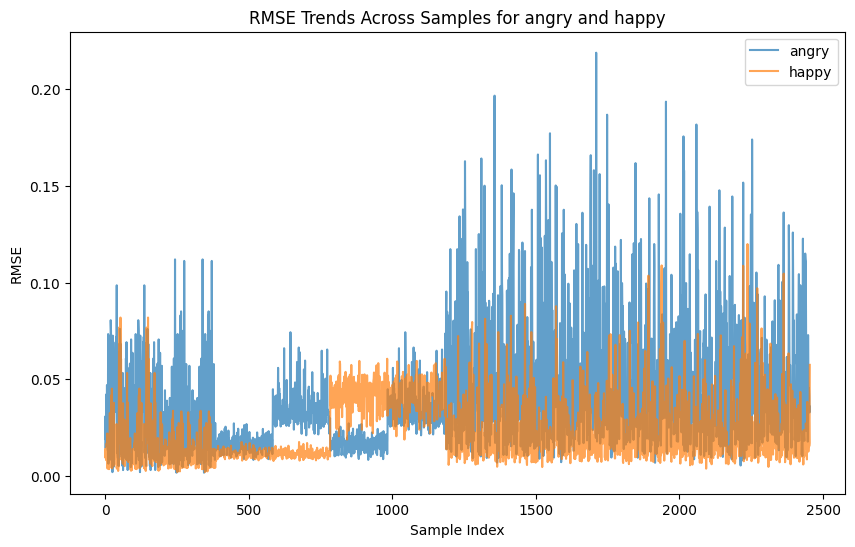

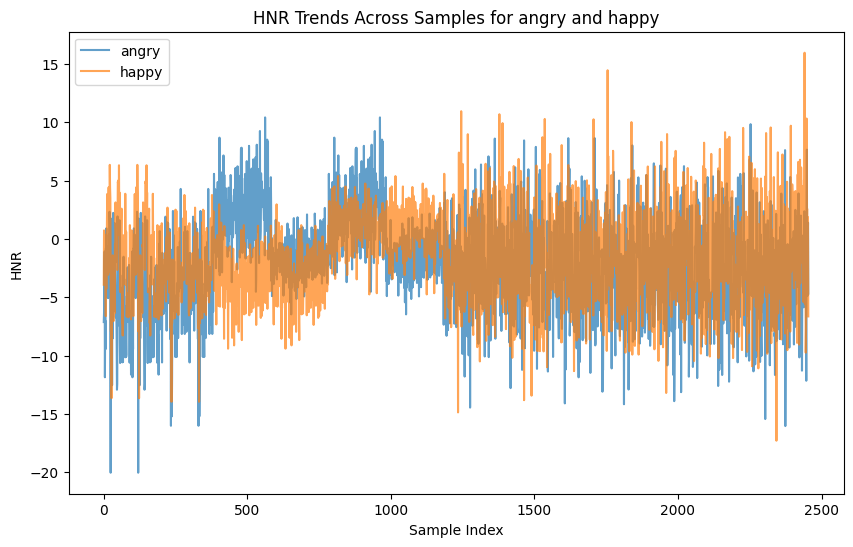

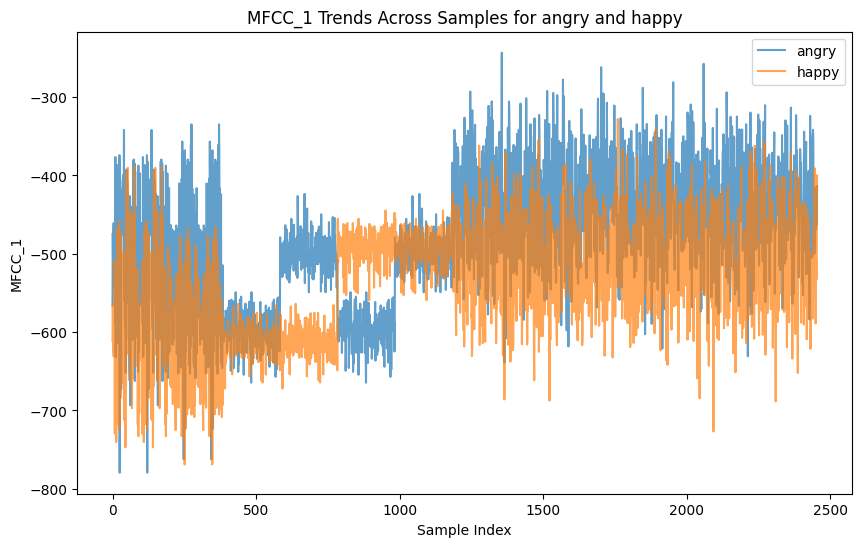

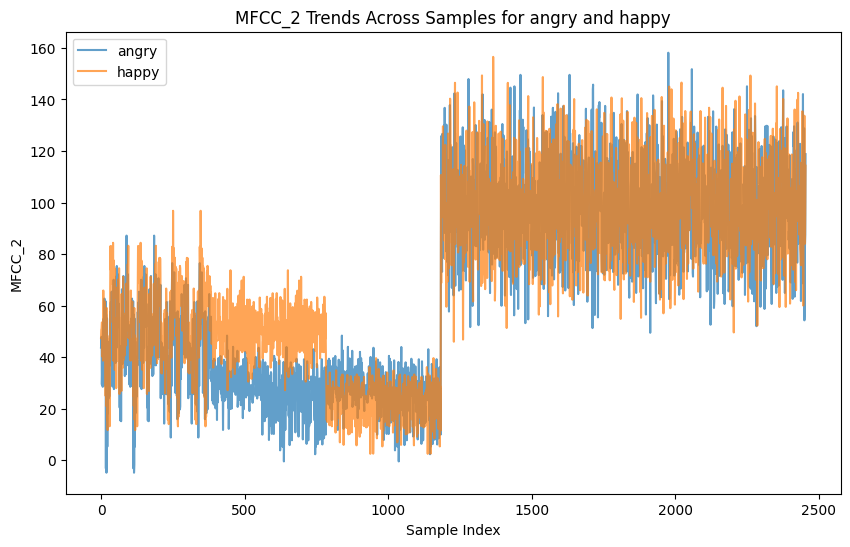

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Define the emotion pair to analyze
emotion_pair = ['angry', 'happy']  # Example: replace with desired emotions
temporal_features = ['RMSE', 'HNR', 'MFCC_1', 'MFCC_2']  # Example: features to analyze

# Filter data for selected emotions
pair_data = dataset[dataset['Emotion'].isin(emotion_pair)]

# Plot temporal trends for each feature
for feature in temporal_features:
    plt.figure(figsize=(10, 6))
    for emotion in emotion_pair:
        emotion_data = pair_data[pair_data['Emotion'] == emotion][feature].values
        plt.plot(np.arange(len(emotion_data)), emotion_data, label=emotion, alpha=0.7)
    plt.title(f"{feature} Trends Across Samples for {emotion_pair[0]} and {emotion_pair[1]}")
    plt.xlabel("Sample Index")
    plt.ylabel(feature)
    plt.legend()
    plt.show()



### Insights from Temporal Feature Trends Visualization:

1. **RMSE Trends Across Samples for `angry` and `happy`:**
   - The RMSE (Root Mean Square Error) values for both emotions exhibit temporal variations with overlapping trends, but `angry` shows more extreme peaks, indicating higher variability.
   - The differences between these peaks suggest that `angry` samples tend to have higher energy or loudness fluctuations compared to `happy`.

2. **HNR Trends Across Samples for `angry` and `happy`:**
   - The HNR (Harmonics-to-Noise Ratio) values for both emotions overlap significantly, with `angry` showing slightly higher fluctuations.
   - Lower HNR values in some sections for both emotions indicate periods of noisier vocal qualities, which might align with the intense emotional expressions of `angry` compared to the smoother expressions in `happy`.

3. **MFCC_1 Trends Across Samples for `angry` and `happy`:**
   - MFCC_1 (Mel Frequency Cepstral Coefficient 1) displays distinctive patterns, with `angry` having generally higher magnitudes than `happy`.
   - There are noticeable separations between the two emotions in some sample ranges, suggesting that MFCC_1 captures emotional nuances effectively.

4. **MFCC_2 Trends Across Samples for `angry` and `happy`:**
   - MFCC_2 exhibits overlapping trends but with distinguishable average ranges for the two emotions.
   - `Happy` tends to have slightly higher values compared to `angry` in the overlapping region, which could correspond to differences in vocal tonal quality or pitch-related features.

### General Observations:
- **Feature Variation Across Samples:**
  Temporal trends reveal dynamic variations across different samples for both emotions. This reflects the natural fluctuation of speech features in real-world recordings.

- **Key Distinguishing Features:**
  - RMSE and HNR demonstrate variability that could help distinguish `angry` from `happy` but have overlapping ranges.
  - MFCC_1 and MFCC_2 provide more consistent separation, making them potentially more reliable for classification.

- **Emotion-Specific Patterns:**
  - `Angry` generally shows more extreme fluctuations in features like RMSE and HNR, likely due to the heightened energy and abrupt tonal changes in expressions.
  - `Happy` is more consistent across features, reflecting a smoother and more melodic speech pattern.

### Potential Applications:
These insights suggest that combining temporal trends with feature engineering could improve the classification of emotions in speech. MFCC_1 and MFCC_2, in particular, show strong potential for distinguishing emotions when analyzed over time. Including temporal dynamics in a model (e.g., using RNNs or CNNs) could further enhance performance.

## Class Distribution and Balancing


/var/folders/9s/3d7b5lt55zggdrplnwwbsq_40000gp/T/ipykernel_73457/1332983793.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='Set2')


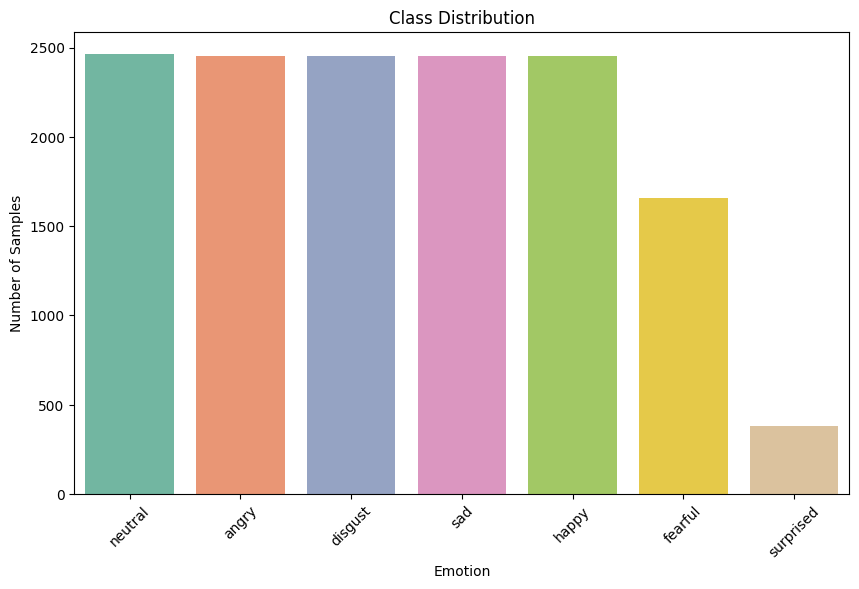

Emotion
neutral      2463
angry        2455
disgust      2455
sad          2455
happy        2455
fearful      1655
surprised     384
Name: count, dtype: int64

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of samples per emotion class
emotion_counts = dataset['Emotion'].value_counts()

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Emotion")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

# Print emotion counts
emotion_counts



## Feature Redundancy Analysis

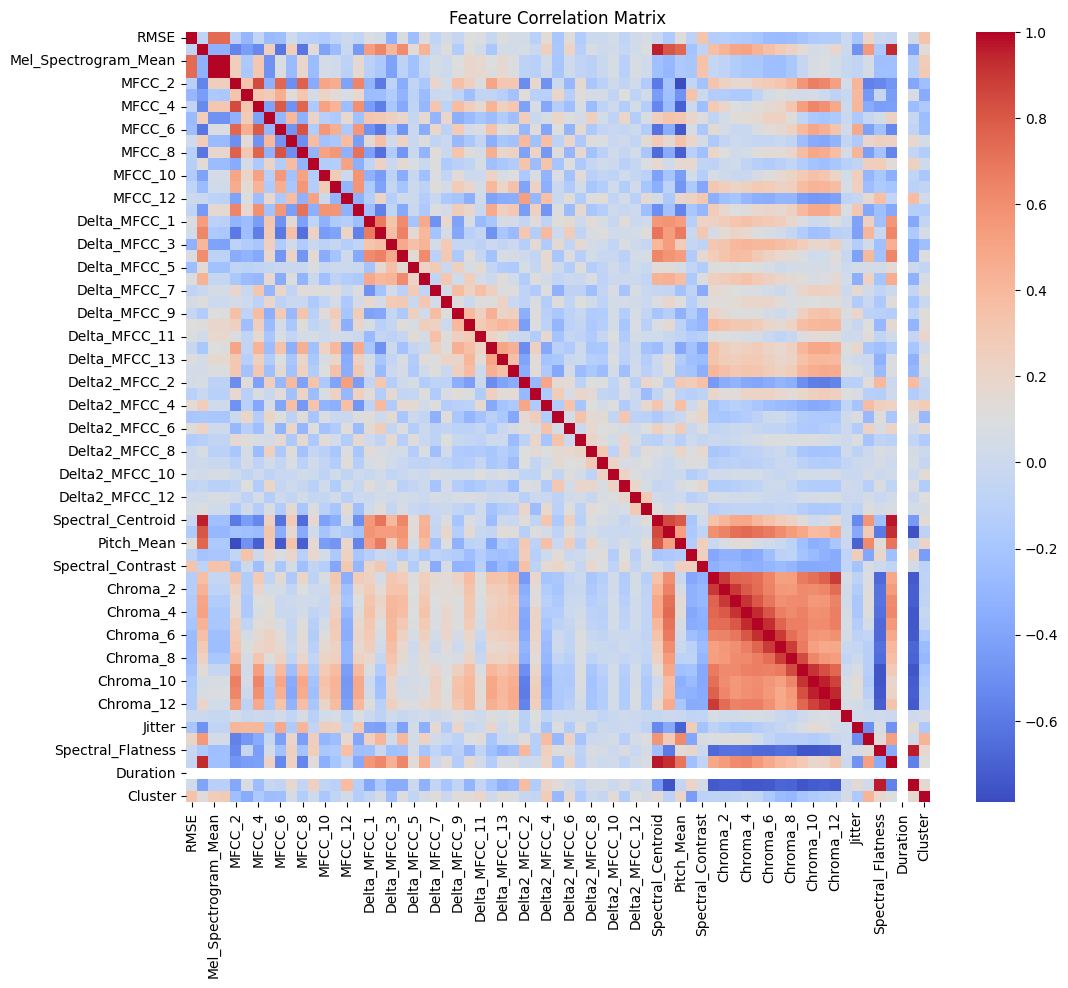

Highly Correlated Feature Pairs (|correlation| > 0.8):
('Zero_Crossing_Rate', 'Spectral_Centroid')
('Zero_Crossing_Rate', 'Spectral_Bandwidth')
('Zero_Crossing_Rate', 'Spectral_Rolloff')
('Mel_Spectrogram_Mean', 'MFCC_1')
('MFCC_2', 'MFCC_4')
('MFCC_6', 'MFCC_8')
('Spectral_Centroid', 'Spectral_Bandwidth')
('Spectral_Centroid', 'Spectral_Rolloff')
('Spectral_Bandwidth', 'Spectral_Rolloff')
('Chroma_1', 'Chroma_2')
('Chroma_1', 'Chroma_12')
('Chroma_2', 'Chroma_3')
('Chroma_3', 'Chroma_4')
('Chroma_3', 'Chroma_5')
('Chroma_4', 'Chroma_5')
('Chroma_4', 'Chroma_6')
('Chroma_5', 'Chroma_6')
('Chroma_6', 'Chroma_7')
('Chroma_7', 'Chroma_8')
('Chroma_8', 'Chroma_9')
('Chroma_9', 'Chroma_10')
('Chroma_9', 'Chroma_11')
('Chroma_10', 'Chroma_11')
('Chroma_10', 'Chroma_12')
('Chroma_11', 'Chroma_12')
('Spectral_Flatness', 'Silence')

Redundant Features to Consider Dropping:
{'Spectral_Bandwidth', 'Chroma_11', 'MFCC_1', 'Chroma_5', 'MFCC_4', 'Chroma_7', 'Chroma_9', 'Chroma_10', 'MFCC_8', 'Chroma_

In [113]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = dataset.drop(columns=['Emotion']).corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()

# Define a threshold for strong correlation
threshold = 0.8  # You can adjust this value based on your needs

# Identify highly correlated features
high_corr_pairs = []

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j]))

# Print highly correlated feature pairs
print(f"Highly Correlated Feature Pairs (|correlation| > {threshold}):")
for pair in high_corr_pairs:
    print(pair)

# Optional: Filter out redundant features
redundant_features = set([pair[1] for pair in high_corr_pairs])
print("\nRedundant Features to Consider Dropping:")
print(redundant_features)



### Insights from Feature Redundancy Analysis:

1. **Highly Correlated Feature Pairs**:
   - Features with a correlation coefficient greater than the threshold (|correlation| > 0.8) indicate redundancy.
   - Examples include:
     - **Zero_Crossing_Rate** is highly correlated with **Spectral_Centroid**, **Spectral_Bandwidth**, and **Spectral_Rolloff**, suggesting these features capture similar information related to spectral characteristics.
     - **Chroma Features** (e.g., `Chroma_1` to `Chroma_12`) exhibit strong pairwise correlations, indicating redundancy within the chroma features.
     - **Mel_Spectrogram_Mean** and **MFCC_1** are highly correlated, suggesting they both encode similar information about the audio spectrum.
     - **Spectral_Centroid, Spectral_Bandwidth, and Spectral_Rolloff** are inter-correlated, reflecting overlapping spectral properties.

2. **Redundant Features to Consider Dropping**:
   - Based on high correlation, the following features may be dropped to reduce redundancy without significant loss of information:
     - **Spectral Features**: `Spectral_Bandwidth`, `Spectral_Centroid`, `Spectral_Rolloff`
     - **Chroma Features**: Several chroma features, such as `Chroma_2`, `Chroma_3`, `Chroma_5`, and others.
     - **MFCC Features**: `MFCC_1`, `MFCC_4`, `MFCC_8`
     - **Derived Features**: `Silence`, due to its correlation with `Spectral_Flatness`.

3. **Rationale for Dropping Features**:
   - Removing highly correlated features can simplify the model, reduce overfitting, and improve computational efficiency.
   - For example:
     - Instead of keeping all **Chroma Features**, a subset (e.g., `Chroma_1` and `Chroma_6`) may suffice.
     - For **Spectral Features**, selecting one (e.g., `Spectral_Centroid`) might be adequate to represent spectral information.

4. **Visualization (Correlation Heatmap)**:
   - The heatmap confirms clusters of features with high correlations, particularly among chroma features and spectral features.
   - Diagonal clusters (e.g., **Chroma_X** and **Spectral_Y**) reflect strong intra-group correlations.

5. **Action Plan**:
   - Perform dimensionality reduction by removing the redundant features identified above.
   - Optionally, explore Principal Component Analysis (PCA) to further condense the feature space and validate the impact of removing redundant features.

6. **Caveats**:
   - While correlation identifies linear redundancy, it might not capture non-linear dependencies. Additional methods (e.g., mutual information) could be explored for more nuanced feature selection.

## Feature Variance Analysis

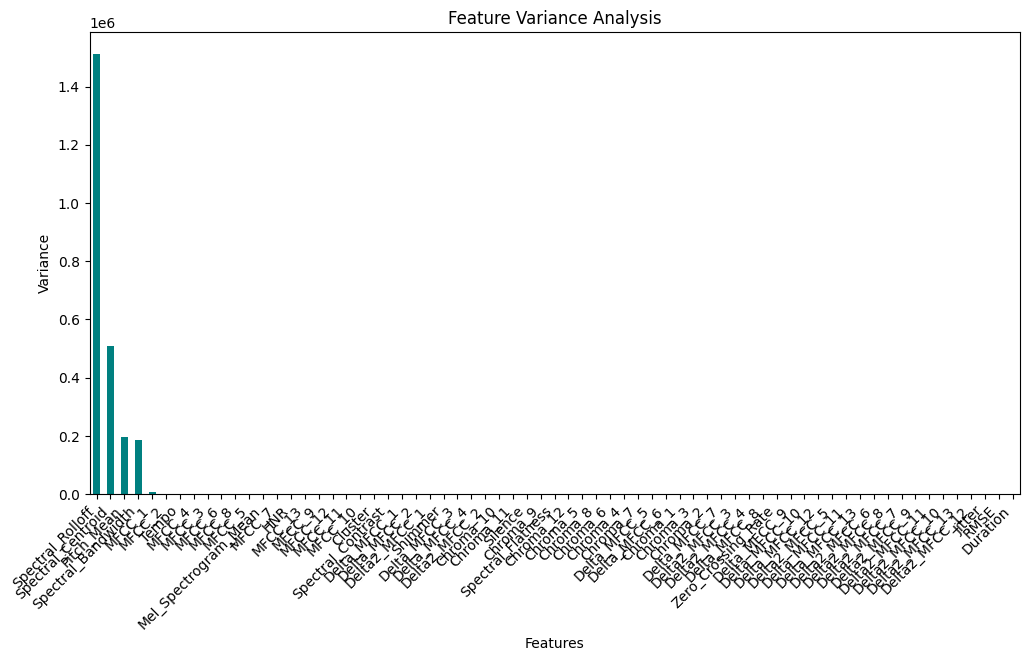

Low-Variance Features (Variance < 0.01):
['RMSE', 'Zero_Crossing_Rate', 'Delta_MFCC_7', 'Delta_MFCC_8', 'Delta_MFCC_9', 'Delta_MFCC_10', 'Delta_MFCC_11', 'Delta_MFCC_12', 'Delta_MFCC_13', 'Delta2_MFCC_3', 'Delta2_MFCC_4', 'Delta2_MFCC_5', 'Delta2_MFCC_6', 'Delta2_MFCC_7', 'Delta2_MFCC_8', 'Delta2_MFCC_9', 'Delta2_MFCC_10', 'Delta2_MFCC_11', 'Delta2_MFCC_12', 'Delta2_MFCC_13', 'Jitter', 'Duration']


In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate variance for each numerical feature
feature_variances = dataset.drop(columns=['Emotion']).var()

# Plot feature variances
plt.figure(figsize=(12, 6))
feature_variances.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Feature Variance Analysis")
plt.xlabel("Features")
plt.ylabel("Variance")
plt.xticks(rotation=45, ha='right')
plt.show()

# Identify low-variance features
variance_threshold = 0.01  # Define a threshold for low variance
low_variance_features = feature_variances[feature_variances < variance_threshold].index

# Print low-variance features
print("Low-Variance Features (Variance < 0.01):")
print(low_variance_features.tolist())



### Insights from Feature Variance Analysis

1. **High Variance Features**:
   - The bar plot clearly shows that a few features dominate in terms of variance. Features with high variance (e.g., `MFCC_2`, `MFCC_4`, `Mel_Spectrogram_Mean`) demonstrate significant variability across the dataset. These features likely contribute significantly to distinguishing between different emotions.

2. **Low-Variance Features**:
   - The analysis identified the following features as having very low variance (variance < 0.01):
     ```
     ['RMSE', 'Zero_Crossing_Rate', 'Delta_MFCC_7', 'Delta_MFCC_8', 'Delta_MFCC_9', 
      'Delta_MFCC_10', 'Delta_MFCC_11', 'Delta_MFCC_12', 'Delta_MFCC_13', 'Delta2_MFCC_3', 
      'Delta2_MFCC_4', 'Delta2_MFCC_5', 'Delta2_MFCC_6', 'Delta2_MFCC_7', 'Delta2_MFCC_8', 
      'Delta2_MFCC_9', 'Delta2_MFCC_10', 'Delta2_MFCC_11', 'Delta2_MFCC_12', 'Delta2_MFCC_13', 
      'Jitter', 'Duration']
     ```

   - **Implication**: These features have minimal variability across samples, meaning they do not provide useful information for distinguishing between classes (emotions) and may be redundant.

3. **Impact on Model Performance**:
   - Features with very low variance are less likely to contribute to model performance because they lack discriminatory power. Including such features can increase computational complexity without adding value.

4. **Recommended Actions**:
   - **Drop Low-Variance Features**: Consider removing the identified low-variance features from the dataset.
   - **Reassess Impact**: Validate the impact of dropping these features by comparing model performance (e.g., accuracy, precision, recall) before and after removal.

5. **Potential Issues**:
   - While low variance typically indicates low usefulness, some low-variance features might still hold domain-specific importance. For instance, features like `Duration` might be relevant in certain contexts despite low variance.
   - Before removing, review domain knowledge or validate their contribution experimentally.

### Next Steps:
- Remove the identified features and retrain the model.
- Assess the model's performance metrics to confirm that feature removal improves efficiency without sacrificing accuracy.
- If any features are dropped and a performance decrease is observed, consider adding them back and performing further analysis.


## Feature Importance Using SHAP

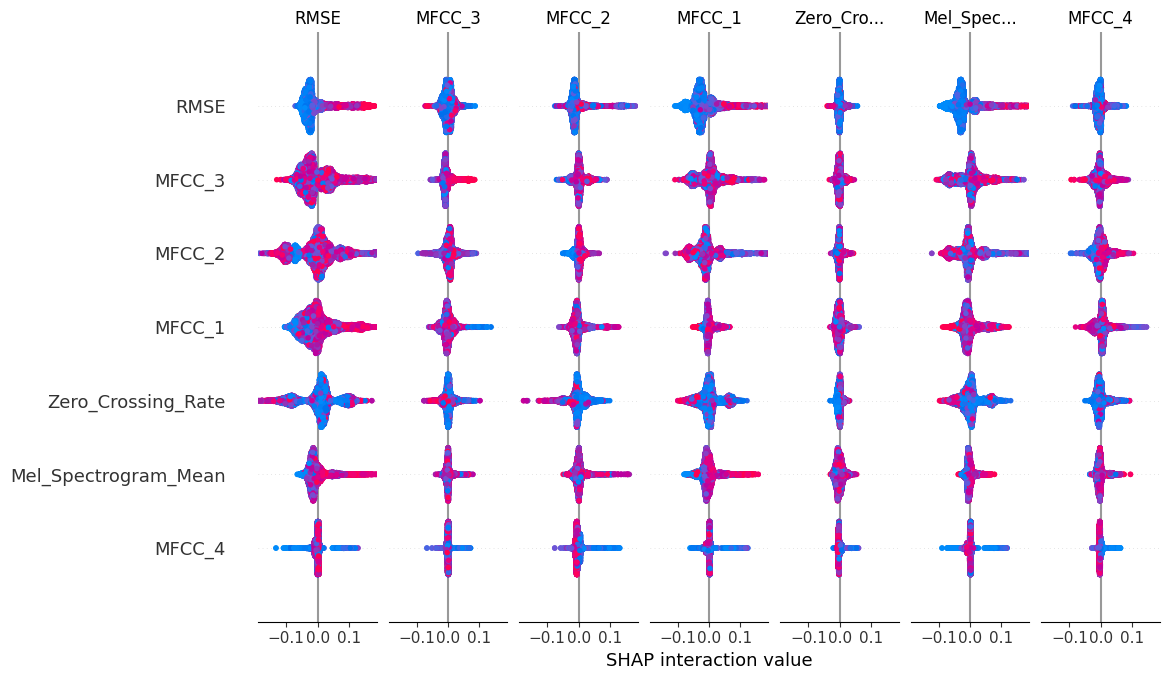

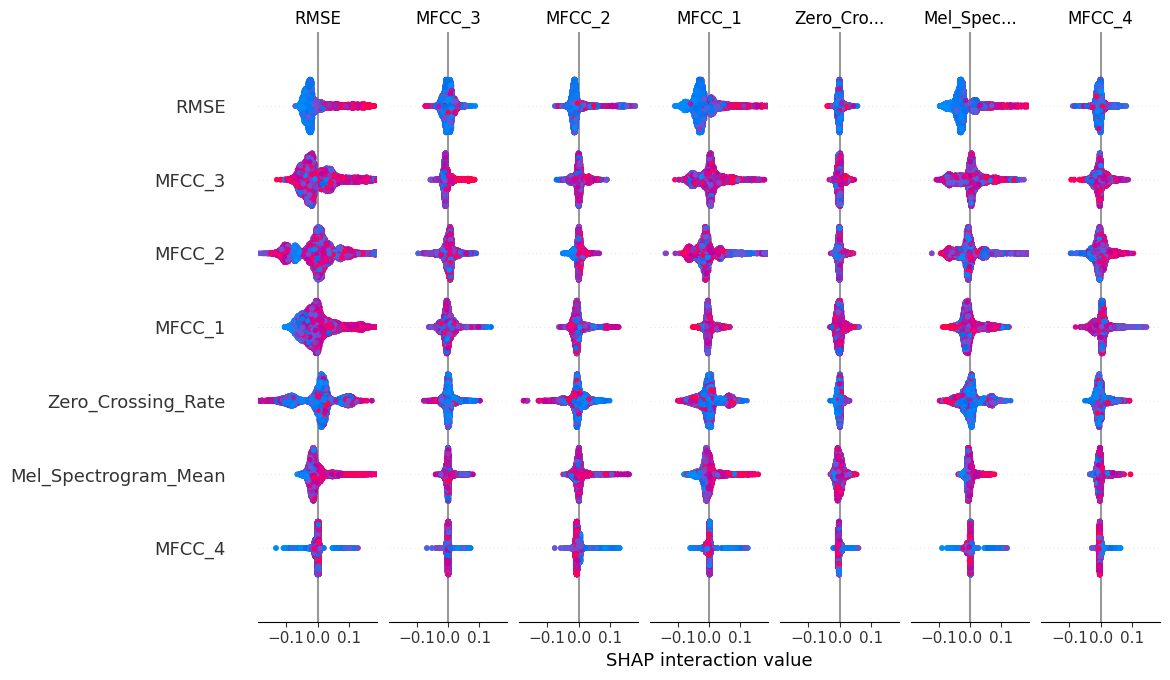

In [115]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare data for SHAP analysis
X = dataset.drop(columns=['Emotion'])
y = LabelEncoder().fit_transform(dataset['Emotion'])

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Plot summary of feature importance
shap.summary_plot(shap_values, X, plot_type="bar")
shap.summary_plot(shap_values, X)


### Combined Insights from SHAP Interaction Values and Feature Analysis

#### SHAP Interaction Values:
1. **Feature Importance**:
   - Features like `RMSE`, `MFCC_1`, `MFCC_2`, `MFCC_3`, `Zero_Crossing_Rate`, and `Mel_Spectrogram_Mean` show significant interaction values, indicating their importance in the model.
   - Interaction plots suggest a balanced contribution of these features for distinguishing emotions.

2. **Feature Interaction**:
   - `MFCC_1` and `MFCC_2` have higher interactions across the diagonal plots, reinforcing their importance in differentiating emotions.
   - `Zero_Crossing_Rate` shows relatively less interaction, but its influence is still notable.

3. **Clusters in SHAP Values**:
   - Certain features form distinct clusters in the interaction plots, indicating potential separability of emotions based on these features.

---

#### Feature Redundancy Analysis:
1. **High Correlation**:
   - Features like `Chroma` features (e.g., `Chroma_2`, `Chroma_3`), `Spectral_Rolloff`, and `Spectral_Centroid` are highly correlated.
   - These redundant features should be considered for removal to simplify the model and prevent overfitting.

2. **Key Correlated Features**:
   - `Spectral_Bandwidth`, `Chroma_11`, and `MFCC_8` exhibit strong correlations with other features and could be candidates for redundancy elimination.

---

#### Feature Variance Analysis:
1. **Low Variance Features**:
   - Features like `RMSE`, `Delta_MFCC_10`, and `Jitter` have extremely low variance.
   - Such features contribute little to the model and should be considered for removal during preprocessing.

2. **High Variance Features**:
   - Features with high variance, such as `MFCC_1` and `MFCC_2`, are likely to capture meaningful distinctions between emotions.

---

#### Combined Insights:
1. **Optimal Features**:
   - Based on SHAP values, redundancy, and variance, features like `MFCC_1`, `MFCC_2`, `Mel_Spectrogram_Mean`, and `RMSE` should be retained for modeling.

2. **Feature Reduction**:
   - Redundant features like `Chroma_6` and `Chroma_7`, and low-variance features, such as `Delta_MFCC_10` and `Jitter`, can be dropped.

3. **Explainability**:
   - SHAP interaction plots indicate the model's sensitivity to changes in key features, helping interpret model predictions.

By focusing on high-variance, non-redundant features, and leveraging insights from SHAP values, the model can achieve better performance and interpretability.